#  Data Management 

This file is used to merge the given two tables and also to generate, Pandas Profiling report everytime needed.

### Joining the 2 Tables Applicant and Loan

There are 2 tables given, Applicant and Loan which are separated logically by the data they consists.

But for EDA and Better understanding of the model we will be joining the 2 tables based upon the relationships in them.

In the Applicant Table we can see the first column as applicant_id which is the <b>Primary key </b> of it.

Moreover, in the Loan Table we can see the Second column as applicant_id which is the <b>Foreign Key </b> of it.

Based upon this common column we will be joining the 2 datasets.


In [2]:
import pandas as pd

#importing the datasets
applicants = pd.read_csv('data/applicant.csv')
loans = pd.read_csv('data/loan.csv')

In [3]:
print(applicants.shape)
loans.shape

(1000, 15)


(1000, 13)

Hence, the Final merged dataset will have the dimensions 

rows = 1000
cols = 15+13-1 = 27 

In [4]:
data = pd.merge(applicants,loans , how="inner", on="applicant_id")

data.shape

(1000, 27)

In [5]:
data

applicant_id  Primary_applicant_age_in_years  Gender  \
0         1469590                              67    male   
1         1203873                              22  female   
2         1432761                              49    male   
3         1207582                              45    male   
4         1674436                              53    male   
..            ...                             ...     ...   
995       1880194                              31  female   
996       1114064                              40    male   
997       1758046                              38    male   
998       1824545                              23    male   
999       1660770                              27    male   

                 Marital_status  Number_of_dependents   Housing  \
0                        single                     1       own   
1    divorced/separated/married                     1       own   
2                        single                     2       own   
3                        single                     2  for free   
4                        single                     2  for free   
..                          ...                   ...       ...   
995  divorced/separated/married                     1       own   
996          divorced/separated                     1       own   
997                      single                     1       own   
998                      single                     1  for free   
999                      single                     1       own   

     Years_at_current_residence  \
0                             4   
1                             2   
2                             3   
3                             4   
4                             4   
..                          ...   
995                           4   
996                           4   
997                           4   
998                           4   
999                           4   

                                     Employment_status  \
0                          skilled employee / official   
1                          skilled employee / official   
2                                 unskilled - resident   
3                          skilled employee / official   
4                          skilled employee / official   
..                                                 ...   
995                               unskilled - resident   
996  management / self-employed / highly qualified ...   
997                        skilled employee / official   
998                        skilled employee / official   
999                        skilled employee / official   

    Has_been_employed_for_at_least Has_been_employed_for_at_most  ...  \
0                          7 years                           NaN  ...   
1                           1 year                       4 years  ...   
2                          4 years                       7 years  ...   
3                          4 years                       7 years  ...   
4                           1 year                       4 years  ...   
..                             ...                           ...  ...   
995                        4 years                       7 years  ...   
996                         1 year                       4 years  ...   
997                        7 years                           NaN  ...   
998                         1 year                       4 years  ...   
999                            NaN                        0 year  ...   

                  Purpose  Principal_loan_amount  \
0    electronic equipment                1169000   
1    electronic equipment                5951000   
2               education                2096000   
3                    FF&E                7882000   
4             new vehicle                4870000   
..                    ...                    ...   
995                  FF&E                1736000   
996          used vehicle                3857000   
997 

### Generating the pandas profiling report.

This report provides basic EDA and an overview of the dataset.

The following important data such as 

<li>Missing Data</li>
<li>Types of Variables</li>
<li>Classes in Ordinal variables</li>
<li>Range of Numeric Variables</li>
<li>Correlations and Sample Data Visualizations</li>

In [6]:
from pandas_profiling import profile_report
profile = profile_report.ProfileReport(data)
profile.to_file(output_file = f"Reports/data_merged.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# def get_report(file):
    
#     from pandas_profiling import profile_report

#     #Loading the dataset
#     df = pd.read_csv(file)
#     #Generate a report
#     profile = profile_report.ProfileReport(df) #minimal == true can be used to reduce the output data stream
#     file_name = (file.split('/')[-1]).split('.')[0]
#     profile.to_file(output_file = f"{file_name}.html")


## Some Inferences from the generated report

<ol>
<li>The Balance of the dataset is 7:3 which makes it critical to think weather it should be balanced or imbalanced. Since w e have adequate amount of records for the minority class I might consider it balanced and apply K-fold while splitting</li>

<li>There are some columns which have more than 60% percent of missing cells. We might need to eliminate them or they will add unnecessary bias incase we try imputing them</li>

<li>All sorts of Variables are present within the dataset and hence, we need to take special care while handling each variable</li>

<li>The Variable "Telephone" is constant (No Use)</li>

</ol>

In [8]:
# Saving the Merged Data
data.to_csv('data/data_merged.csv',index= False)

## Report of preprocessed data

In [9]:
def get_report(file):
    
    from pandas_profiling import profile_report

    #Loading the dataset
    df = pd.read_csv(file)
    #Generate a report
    profile = profile_report.ProfileReport(df) #minimal == true can be used to reduce the output data stream
    file_name = (file.split('/')[-1]).split('.')[0]
    profile.to_file(output_file = f"Reports/{file_name}.html")

get_report(r'data\Preprocessed\final.csv')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Data Analysis & Feature Engineering

## Some Insights from the Raw Data


<li> The Dataset is Imabalanced</li>
<li>The Balance of the dataset is 7:3 which makes it critical to think weather it should be balanced or imbalanced. Since w e have adequate amount of records for the minority class I might consider it balanced and apply K-fold while splitting</li>

<li>There are some columns which have more than 60% percent of missing cells. We might need to eliminate them or they will add unnecessary bias incase we try imputing them</li>

<li>All sorts of Variables are present within the dataset and hence, we need to take special care while handling each variable</li>

<li>The Variable "Telephone" is constant (No Use)</li>


In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.impute import KNNImputer, SimpleImputer
import  matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import json 
import jsonpickle
from json import JSONEncoder


In [70]:
data = pd.read_csv('data/data_merged.csv')

In [71]:
data.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [73]:
features = list(data.columns)

# Taking an overview of the data

In [74]:
data.describe()

applicant_id  Primary_applicant_age_in_years  Number_of_dependents  \
count  1.000000e+03                     1000.000000           1000.000000   
mean   1.514763e+06                       35.546000              1.155000   
std    2.286764e+05                       11.375469              0.362086   
min    1.105364e+06                       19.000000              1.000000   
25%    1.321398e+06                       27.000000              1.000000   
50%    1.529114e+06                       33.000000              1.000000   
75%    1.707752e+06                       42.000000              1.000000   
max    1.903505e+06                       75.000000              2.000000   

       Years_at_current_residence  Foreign_worker  Months_loan_taken_for  \
count                 1000.000000     1000.000000            1000.000000   
mean                     2.845000        0.963000              20.903000   
std                      1.103718        0.188856              12.058814   
min                      1.000000        0.000000               4.000000   
25%                      2.000000        1.000000              12.000000   
50%                      3.000000        1.000000              18.000000   
75%                      4.000000        1.000000              24.000000   
max                      4.000000        1.000000              72.000000   

       Principal_loan_amount  EMI_rate_in_percentage_of_disposable_income  \
count           1.000000e+03                                  1000.000000   
mean            3.271258e+06                                     2.973000   
std             2.822737e+06                                     1.118715   
min             2.500000e+05                                     1.000000   
25%             1.365500e+06                                     2.000000   
50%             2.319500e+06                                     3.000000   
75%             3.972250e+06                                     4.000000   
max             1.842400e+07                                     4.000000   

       Has_coapplicant  Has_guarantor  Number_of_existing_loans_at_this_bank  \
count      1000.000000    1000.000000                            1000.000000   
mean          0.041000       0.052000                               1.407000   
std           0.198389       0.222138                               0.577654   
min           0.000000       0.000000                               1.000000   
25%           0.000000       0.000000                               1.000000   
50%           0.000000       0.000000                               1.000000   
75%           0.000000       0.000000                               2.000000   
max           1.000000       1.000000                               4.000000   

       high_risk_applicant  
count          1000.000000  
mean              0.300000  
std               0.458487  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [76]:
obj_cols = list(data.select_dtypes(include='object'))
(obj_cols)

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Other_EMI_plans',
 'Loan_history']

In [77]:
numeric_cols = list(data.select_dtypes(exclude='object'))
(numeric_cols)

['applicant_id',
 'Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

From the above Data we can infer that there are 12 numeric cols and 15 non-numeric cols.

# Exploring The Data 

<AxesSubplot:>

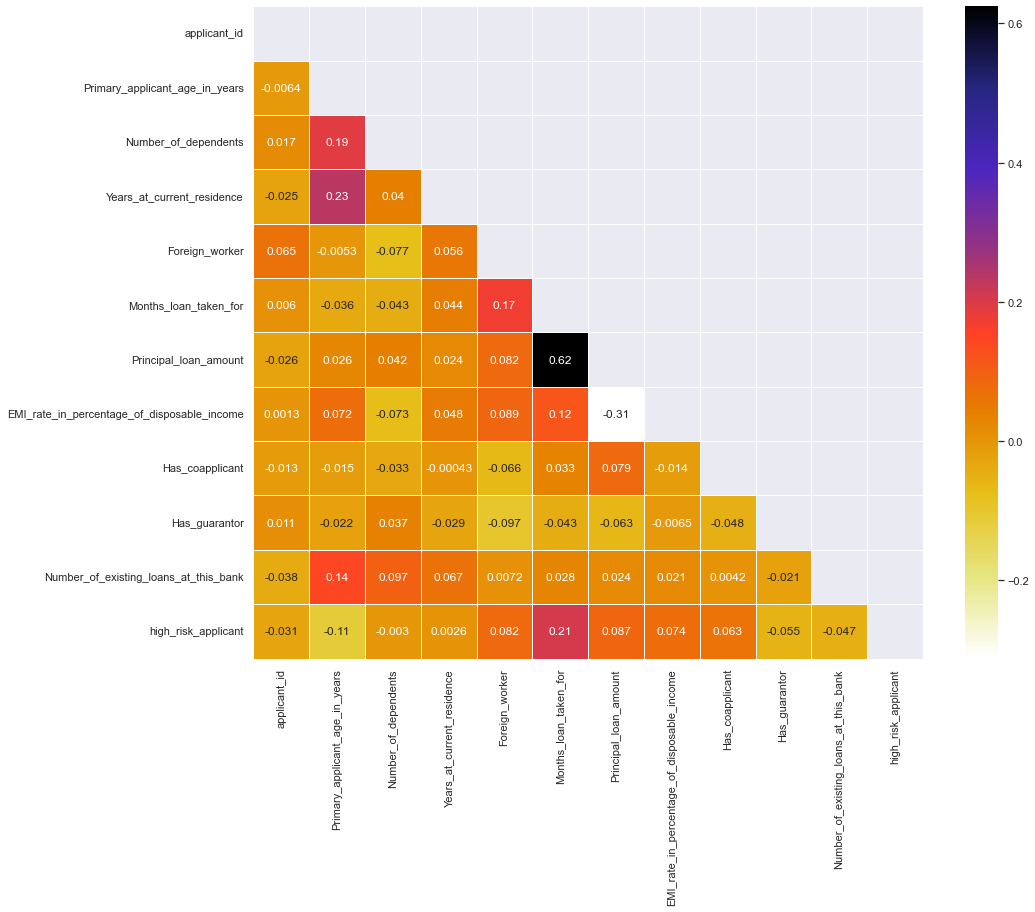

In [78]:
figure(figsize=(15, 12))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap=plt.cm.CMRmap_r, linewidths=.5, mask=mask)

<h3><b>Insights of the correlations</b></h3>
<li>Duration for which the loan was taken is higly correlated with applicant being a defaulter.</li>
<li>The more is the age of the applicant the more loans he might take</li>
<li>The more is the principal amount the more Longer it gets.</li>
<li>The more is the age of the applicant the longer he is supposed to live at the same residence.</li>
<li>Foreign Workers usually take Bigger and longer loans.</li>
<li>The More the dependants the more loans a person takes</li>
<li>The more the applicants age the more people depend on him</li>
<br>
<li> We must also obeserve that there are 12 cols in the above plot which means there are 15 cols with no-numeric datatype</li>

<br>
<br>
<br>

<b>All the above made conclusions are logically correct and hence, we can also conclude that the data is natural and not artificially made.</b>


## Handling Missing Values

<AxesSubplot:>

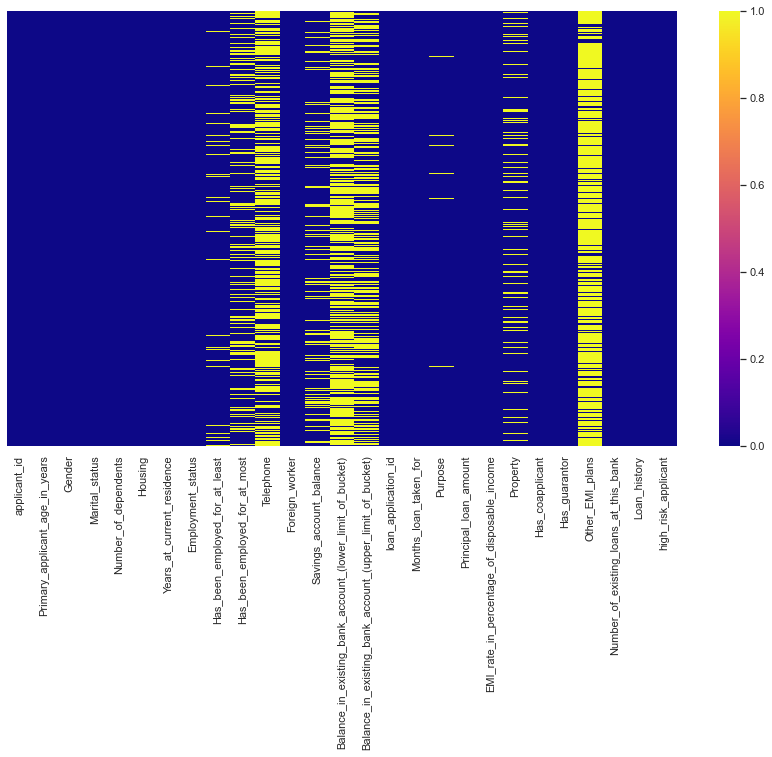

In [79]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='plasma')

From te above Data we can conclude that

<li>There are total 9 columns with null values</li>
<li>Out of the 9 columns 2 Columns namely 'Telephone' and      'Other_EMI_plans' needs to be eliminated entirely. Since, Telephone is a constant and Other_EMI_Plans have more than 80% null Values</li>
<li>The 2 columns 'Existing Bank Balance' also needs to be eliminated and they also do not enough variance among the data</li>


In [80]:
pd.Series(data.isnull().sum()).sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Months_loan_taken_for                                         0
Loan_history                                                  0
Number_of_existing_loans_at_this_bank                         0
Has_guarantor                                                 0
Has_coapplicant                                               0
EMI_rate_in_percentage_of_disposable_income                   0
Principal_loan_amount                   

As you can see there are 9 features with missing values most of which are Non-Nomeric. 

Hence we would need to apply Imputation where we have atleast 60% of the data available and drop the columns with with more than 40% of the missign Data.

In [81]:
## Eliminating the columns
cols_to_remove = [
    'Other_EMI_plans',
    'Telephone',         
'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
'Balance_in_existing_bank_account_(upper_limit_of_bucket)' ]
data_with_23_cols = data.drop(cols_to_remove, axis = 1)

<b>  We will impute the remaining features using KNN imputer</b>

Since, all the columns that require imputation are non-numeric.

<AxesSubplot:>

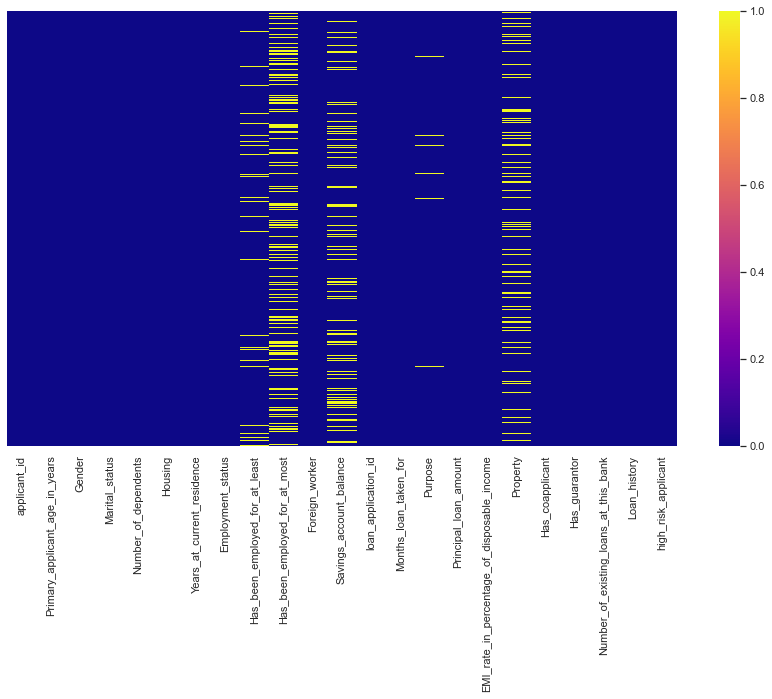

In [82]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_with_23_cols.isnull(), yticklabels=False, cbar=True, cmap='plasma')

In [83]:
cols_to_impute = ['Has_been_employed_for_at_most',                               
'Savings_account_balance',                                     
'Property',                                                    
'Has_been_employed_for_at_least',                              
'Purpose' ] 

In [84]:

def impute_by_KNN(df,column_name):
    fact_col, lable = pd.factorize(df[column_name])
    imputer = KNNImputer(n_neighbors=5, weights="distance", add_indicator = True)
    imputed = imputer.fit_transform([fact_col])
    imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
    df.drop(columns=column_name, inplace=True)
    df[column_name ] = imputed[0]
    return df
    

In [85]:
for col in cols_to_impute:
    impute_by_KNN(data_with_23_cols,col)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manuall

<AxesSubplot:>

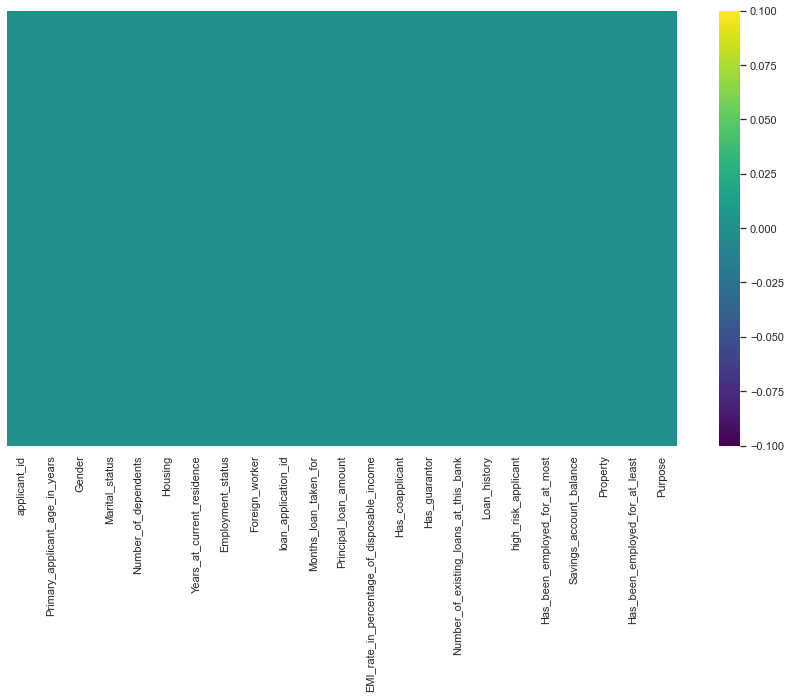

In [86]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_with_23_cols.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<b> Hence, Our Data has no more missing Values </b>

As we can see there are many features having string or object data types hence, we will be converting them to int or float in order to preprocess them properly

# Handling Categorical Variables

In [87]:
obj_cols = list(data_with_23_cols.select_dtypes(include='object'))
obj_cols

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'loan_application_id',
 'Loan_history',
 'Has_been_employed_for_at_most',
 'Savings_account_balance',
 'Property',
 'Has_been_employed_for_at_least',
 'Purpose']

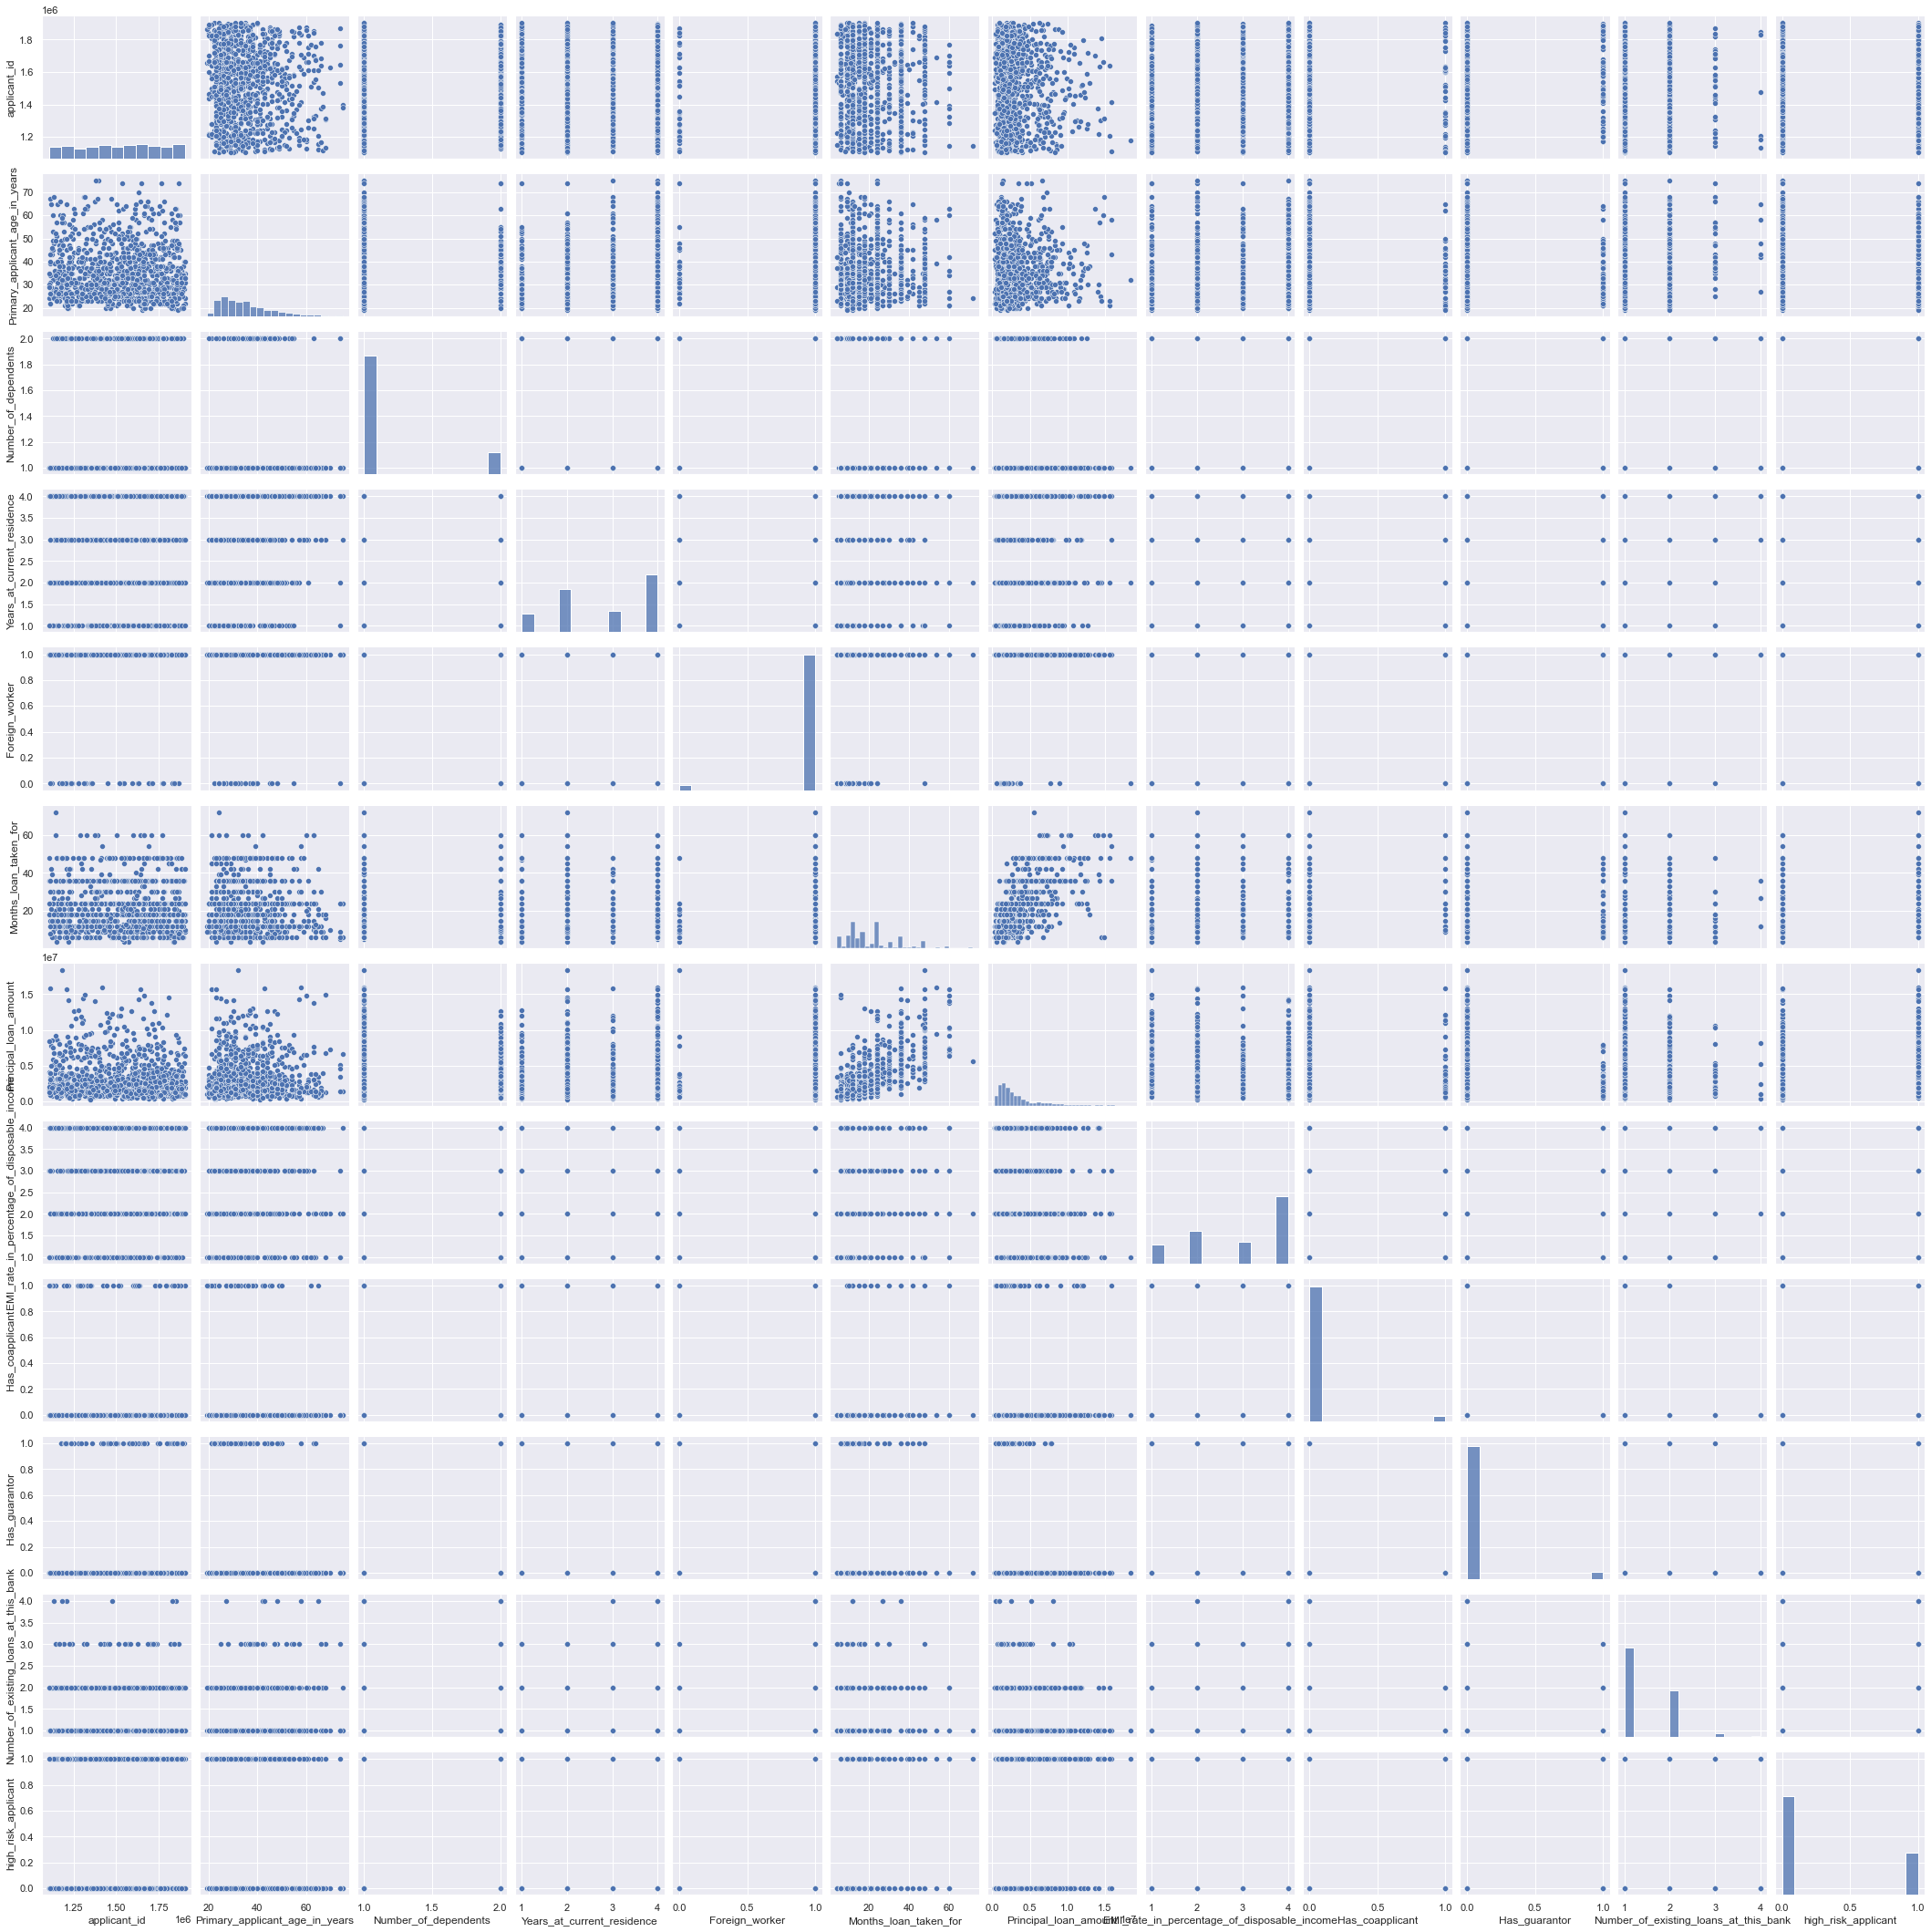

In [88]:
sns.pairplot(data_with_23_cols)

#### Applying One-Hot encoding on Nominal Features and Factorizing Ordinal Features

In [89]:
Nominals = ['Gender', 'Marital_status', 'Housing']
Ordinals = ['Employment_status', 'Savings_account_balance', 'Purpose', 'Loan_history', 'Property']

According to my research on the Problem Only the Above Features are Nominals or Ordinals  and the remaning ones are Numeric, just the type is object

<b>One Hot Encoding</b>

In [90]:
#One Hot Encoding
def encode(df, Nominals):
    for i in Nominals:
        dummies  = pd.get_dummies(df[i], drop_first = True, prefix=i)
        df = pd.concat([df,dummies], axis=1)
        df= df.drop(i, axis = 1)
    return df

one_hot_encoded_data= encode(data_with_23_cols, Nominals)

In [91]:
one_hot_encoded_data

applicant_id  Primary_applicant_age_in_years  Number_of_dependents  \
0         1469590                              67                     1   
1         1203873                              22                     1   
2         1432761                              49                     2   
3         1207582                              45                     2   
4         1674436                              53                     2   
..            ...                             ...                   ...   
995       1880194                              31                     1   
996       1114064                              40                     1   
997       1758046                              38                     1   
998       1824545                              23                     1   
999       1660770                              27                     1   

     Years_at_current_residence  \
0                             4   
1                             2   
2                             3   
3                             4   
4                             4   
..                          ...   
995                           4   
996                           4   
997                           4   
998                           4   
999                           4   

                                     Employment_status  Foreign_worker  \
0                          skilled employee / official               1   
1                          skilled employee / official               1   
2                                 unskilled - resident               1   
3                          skilled employee / official               1   
4                          skilled employee / official               1   
..                                                 ...             ...   
995                               unskilled - resident               1   
996  management / self-employed / highly qualified ...               1   
997                        skilled employee / official               1   
998                        skilled employee / official               1   
999                        skilled employee / official               1   

                      loan_application_id  Months_loan_taken_for  \
0    d68d975e-edad-11ea-8761-1d6f9c1ff461                      6   
1    d68d989e-edad-11ea-b1d5-2bcf65006448                     48   
2    d68d995c-edad-11ea-814a-1b6716782575                     12   
3    d68d99fc-edad-11ea-8841-17e8848060ae                     42   
4    d68d9a92-edad-11ea-9f3d-1f8682db006a                     24   
..                                    ...                    ...   
995  d68fbba6-edad-11ea-80fe-30b2f9300e3d                     12   
996  d68fbc28-edad-11ea-bc62-4240ac0824fa                     30   
997  d68fbcaa-edad-11ea-aafc-2de1139e42cd                     12   
998  d68fbd2c-edad-11ea-b49e-2894666f2df6                     45   
999  d68fbdae-edad-11ea-a2ea-1c661d77d225                     45   

     Principal_loan_amount  EMI_rate_in_percentage_of_disposable_income  ...  \
0                  1169000                                            4  ...   
1                  5951000                                            2  ...   
2                  2096000                                            2  ...   
3                  7882000                                            2  ...   
4                  4870000                                            3  ...   
..                     ...                                          ...  ...   
995                1736000                                            3  ...   
996                3857000                                            4  ...   
997                 804000                                            4  ...   
998                1845000                                            4  ...   
999                4576000                                            3  ...   

     Savings_acc

<b>Factorizing</b>

In [92]:
# Storing lables for future use

lables = []
for i in Ordinals:
    one_hot_encoded_data[i], lable= pd.factorize(one_hot_encoded_data[i])
    lables.append(lable)




In [93]:
lables1 = {'lables': lables}
sampleJson = jsonpickle.encode(lables1)
with open('lables.json', 'w') as f:
    json.dump(sampleJson, f)

In [94]:
one_hot_encoded_data

applicant_id  Primary_applicant_age_in_years  Number_of_dependents  \
0         1469590                              67                     1   
1         1203873                              22                     1   
2         1432761                              49                     2   
3         1207582                              45                     2   
4         1674436                              53                     2   
..            ...                             ...                   ...   
995       1880194                              31                     1   
996       1114064                              40                     1   
997       1758046                              38                     1   
998       1824545                              23                     1   
999       1660770                              27                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

                      loan_application_id  Months_loan_taken_for  \
0    d68d975e-edad-11ea-8761-1d6f9c1ff461                      6   
1    d68d989e-edad-11ea-b1d5-2bcf65006448                     48   
2    d68d995c-edad-11ea-814a-1b6716782575                     12   
3    d68d99fc-edad-11ea-8841-17e8848060ae                     42   
4    d68d9a92-edad-11ea-9f3d-1f8682db006a                     24   
..                                    ...                    ...   
995  d68fbba6-edad-11ea-80fe-30b2f9300e3d                     12   
996  d68fbc28-edad-11ea-bc62-4240ac0824fa                     30   
997  d68fbcaa-edad-11ea-aafc-2de1139e42cd                     12   
998  d68fbd2c-edad-11ea-b49e-2894666f2df6                     45   
999  d68fbdae-edad-11ea-a2ea-1c661d77d225                     45   

     Principal_loan_amount  EMI_rate_in_percentage_of_disposable_income  ...  \
0                  1169000                                            4  ...   
1                  5951000                                            2  ...   
2                  2096000                                            2  ...   
3                  7882000                                            2  ...   
4                  4870000                                            3  ...   
..                     ...                                          ...  ...   
995                1736000                                            3  ...   
996                3857000                                            4  ...   
997                 804000                                            4  ...   
998                1845000                                            4  ...   
999                4576000                                            3  ...   

     Savings_account_balance  Property  Has_been_employed_for_at_least  \
0                          0         0                         7 years   
1                          1         0                          1 year   
2                          1         0                         4 years   
3                          1         1                         4 years   
4                          1         2                          1 year   
..                       ...       ...   

### Reamaining Categorical Columns

Now there are only 3 Categorical Columns Remaining

<li> Application Id </li>
<li> Least Employement</li>
<li>Max Employement</li>

Out of these Application Id would be removed since it is a primary key.
The Remaining 2 columns could be merged into one column as Average Employement by taking the average of the 2 

In [95]:
one_hot_encoded_data = one_hot_encoded_data.drop('loan_application_id', axis=1)

In [96]:
one_hot_encoded_data 

applicant_id  Primary_applicant_age_in_years  Number_of_dependents  \
0         1469590                              67                     1   
1         1203873                              22                     1   
2         1432761                              49                     2   
3         1207582                              45                     2   
4         1674436                              53                     2   
..            ...                             ...                   ...   
995       1880194                              31                     1   
996       1114064                              40                     1   
997       1758046                              38                     1   
998       1824545                              23                     1   
999       1660770                              27                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Months_loan_taken_for  Principal_loan_amount  \
0                        6                1169000   
1                       48                5951000   
2                       12                2096000   
3                       42                7882000   
4                       24                4870000   
..                     ...                    ...   
995                     12                1736000   
996                     30                3857000   
997                     12                 804000   
998                     45                1845000   
999                     45                4576000   

     EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  ...  \
0                                              4                0  ...   
1                                              2                0  ...   
2                                              2                0  ...   
3                                              2                0  ...   
4                                              3                0  ...   
..                                           ...              ...  ...   
995                                            3                0  ...   
996                                            4                0  ...   
997                                            4                0  ...   
998                                            4                0  ...   
999                                            3                0  ...   

     Savings_account_balance  Property  Has_been_employed_for_at_least  \
0                          0         0                         7 years   
1                          1         0                          1 year   
2                          1         0                         4 years   
3                          1         1                         4 years   
4                          1         2                          1 year   
..                       ...       ...                             ...   
995                        1         0                         4 years   
996                        1         1                          1 year   
997                        1         2                         7 years 

In [97]:
average_employed_years = []
for i, j in zip(one_hot_encoded_data['Has_been_employed_for_at_most'], one_hot_encoded_data['Has_been_employed_for_at_least']):
    i = int(i.replace('years', '').replace('year', '').strip())
    j = int(j.replace('years', '').replace('year', '').strip())
    average_employed_years.append((i+j)/2)


In [98]:
one_hot_encoded_data['average_employed_years'] = average_employed_years
one_hot_encoded_data = one_hot_encoded_data.drop('Has_been_employed_for_at_most', axis=1)
one_hot_encoded_data = one_hot_encoded_data.drop('Has_been_employed_for_at_least', axis=1)


In [99]:
one_hot_encoded_data

applicant_id  Primary_applicant_age_in_years  Number_of_dependents  \
0         1469590                              67                     1   
1         1203873                              22                     1   
2         1432761                              49                     2   
3         1207582                              45                     2   
4         1674436                              53                     2   
..            ...                             ...                   ...   
995       1880194                              31                     1   
996       1114064                              40                     1   
997       1758046                              38                     1   
998       1824545                              23                     1   
999       1660770                              27                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Months_loan_taken_for  Principal_loan_amount  \
0                        6                1169000   
1                       48                5951000   
2                       12                2096000   
3                       42                7882000   
4                       24                4870000   
..                     ...                    ...   
995                     12                1736000   
996                     30                3857000   
997                     12                 804000   
998                     45                1845000   
999                     45                4576000   

     EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  ...  \
0                                              4                0  ...   
1                                              2                0  ...   
2                                              2                0  ...   
3                                              2                0  ...   
4                                              3                0  ...   
..                                           ...              ...  ...   
995                                            3                0  ...   
996                                            4                0  ...   
997                                            4                0  ...   
998                                            4                0  ...   
999                                            3                0  ...   

     Savings_account_balance  Property  Purpose  Gender_male  \
0                          0         0        0            1   
1                          1         0        0            0   
2                          1         0        1            1   
3                          1         1        2            1   
4                          1         2        3            1   
..                       ...       ...      ...          ...   
995                        1         0        2            0   
996                        1         1        4            1   
997                        1         2        0            1   
998                        1         2        0            1   
999                        0     

<b> Dropping Applicant Id since it is a primary key and has no logical significance</b>

In [100]:
one_hot_encoded_data = one_hot_encoded_data.drop('applicant_id', axis=1)

In [101]:
one_hot_encoded_data

Primary_applicant_age_in_years  Number_of_dependents  \
0                                67                     1   
1                                22                     1   
2                                49                     2   
3                                45                     2   
4                                53                     2   
..                              ...                   ...   
995                              31                     1   
996                              40                     1   
997                              38                     1   
998                              23                     1   
999                              27                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Months_loan_taken_for  Principal_loan_amount  \
0                        6                1169000   
1                       48                5951000   
2                       12                2096000   
3                       42                7882000   
4                       24                4870000   
..                     ...                    ...   
995                     12                1736000   
996                     30                3857000   
997                     12                 804000   
998                     45                1845000   
999                     45                4576000   

     EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  \
0                                              4                0   
1                                              2                0   
2                                              2                0   
3                                              2                0   
4                                              3                0   
..                                           ...              ...   
995                                            3                0   
996                                            4                0   
997                                            4                0   
998                                            4                0   
999                                            3                0   

     Has_guarantor  ...  Savings_account_balance  Property  Purpose  \
0                0  ...                        0         0        0   
1                0  ...                        1         0        0   
2                0  ...                        1         0        1   
3                1  ...                        1         1        2   
4                0  ...                        1         2        3   
..             ...  ...                      ...       ...      ...   
995              0  ...                        1         0        2   
996              0  ...                        1         1        4   
997              0  ...                        1         2        0   
998              0  ...                        1         2        0   
999              0  ...                        0         2        4   

     Gender_male  Marital_status_divorced/separated/married  \
0              1                                 

## Saving the Progress till now

In [102]:
one_hot_encoded_data.to_csv('Data/Preprocessed/encoded.csv')

In [103]:
data = one_hot_encoded_data
data.shape

(1000, 23)

In [104]:
numeric_cols = [i for i in data.columns if i not in Nominals + Ordinals + ['Foreign_worker', 'Has_guarantor', 'high_risk_applicant', 'Gender_male',
 'Marital_status_divorced/separated/married',
 'Marital_status_married/widowed',
 'Marital_status_single',
 'Housing_own',
 'Housing_rent', 
 'Has_coapplicant']]

numeric_cols

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Number_of_existing_loans_at_this_bank',
 'average_employed_years']

# Looking Out for Outliers

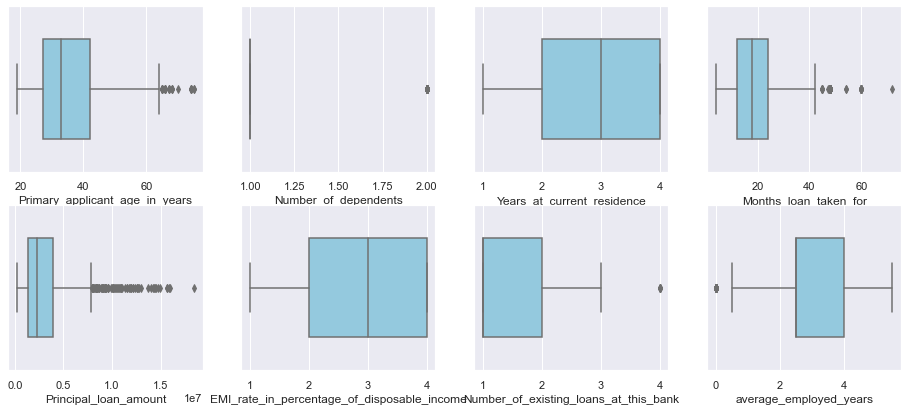

In [105]:
figure(figsize=(16, 14))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data = data, x = numeric_cols[i],  width=.6,color='skyblue')

#### Observations

<li> From the above plot we can infer that there are very few features having significant  outliers</li>
<li>The Features Principal , Age, Months loan taken far have some significant amount of Outliers</li>
<li>Since, we would be Using Randome Forest Classifiers and XG Boost Models the outliers might not affect significantly</li>


#### now we will be checking actually how many outliers are present in the 3 cols and how extreme they are

In [106]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [107]:
ou1 = detect_outliers(data['Months_loan_taken_for'])
ou2 = detect_outliers(data['Primary_applicant_age_in_years'])
ou3 = detect_outliers(data['Principal_loan_amount'])
print(ou1)
print(ou2)
print(ou3)

[60, 60, 60, 60, 60, 60, 60, 60, 60, 72, 60, 60, 60, 60]
[70, 74, 75, 74, 75, 74, 74]
[12579000, 14421000, 12612000, 15945000, 11938000, 14555000, 12169000, 11998000, 13756000, 14782000, 14318000, 12976000, 11760000, 12389000, 12204000, 15653000, 14027000, 14179000, 12680000, 15857000, 11816000, 15672000, 18424000, 14896000, 12749000]


Hence, we found that there are few values in 2 features which require some imputation but since the features are correlated and changing/imputing values would have a significant effect we would not impute anything and leave the values as it is.

## Feature Transformations

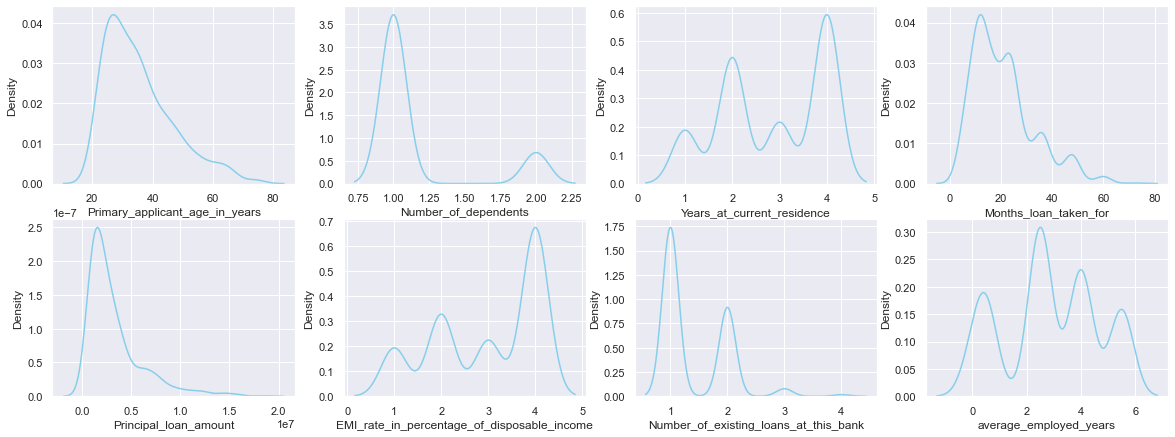

In [108]:
figure(figsize=(20, 15))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(data = data, x = numeric_cols[i], color='skyblue')

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

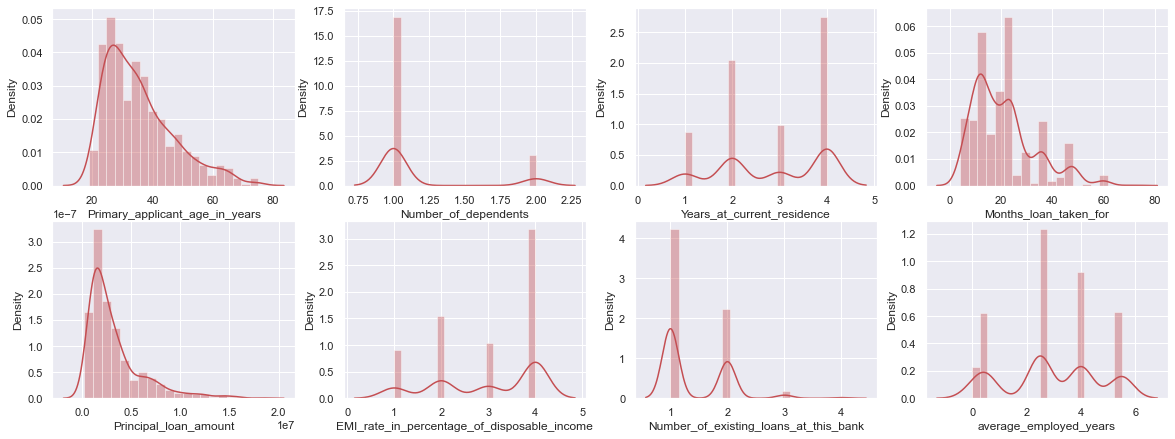

In [109]:
figure(figsize=(20, 15))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1,)
    sns.color_palette("hls", 8)
    sns.distplot(data[numeric_cols[i]], color = 'r', bins= 20)

#### Observations from above Data

<li>The columns age, months and principal do seam to have normal distribution and the other columns are suffieciently descrete.</li>
<li>Although age, months and princpal are all left skewed and hence, we will be transforming them to form a proper Normal Distribution</li>


In [110]:

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [111]:
numeric_cols

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Number_of_existing_loans_at_this_bank',
 'average_employed_years']

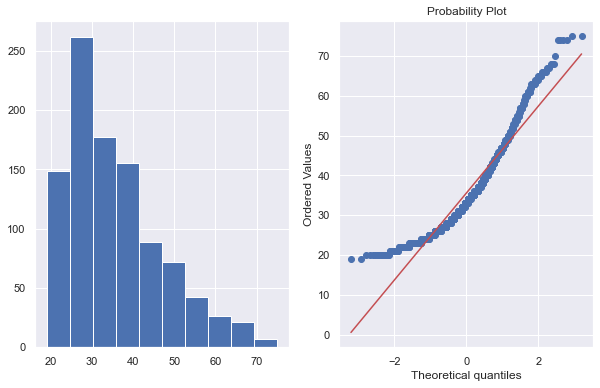

In [112]:
plot_data(data,'Primary_applicant_age_in_years')

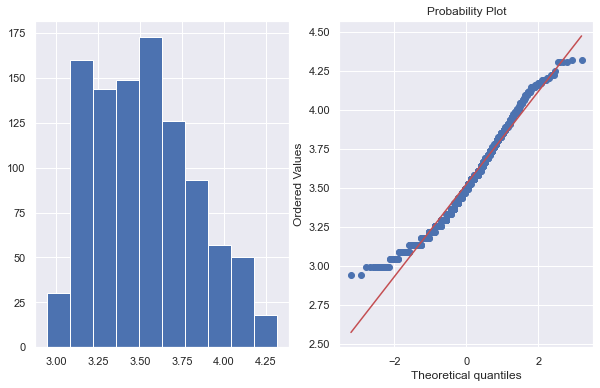

In [113]:
data['Primary_applicant_age_in_years_log']=np.log(data['Primary_applicant_age_in_years'])
plot_data(data,'Primary_applicant_age_in_years_log')

##### As you can see taking the log of values that is converting them to lagrithmic distribution makes the data even more normally distrubuted. Hence, we will be applying the same method to other 2 features as well

In [114]:
data['Primary_applicant_age_in_years']=np.log1p(data['Primary_applicant_age_in_years'])
data['Principal_loan_amount']=np.log1p(data['Principal_loan_amount'])
data['average_employed_years']=np.log1p(data['average_employed_years'])

normally_distributed_data  = data.drop('Primary_applicant_age_in_years_log', axis = 1)

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

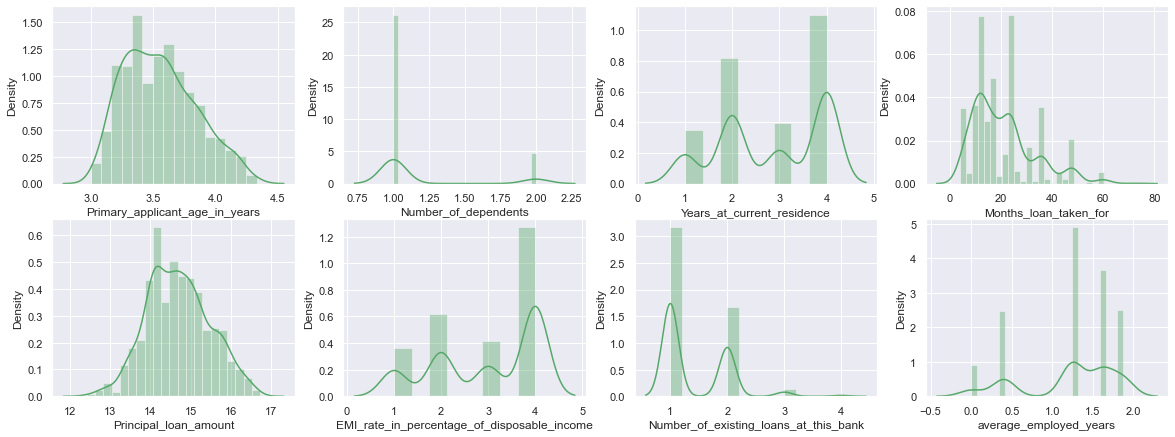

In [115]:
figure(figsize=(20, 15))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1,)
    sns.color_palette("hls", 8)
    sns.distplot(data[numeric_cols[i]], color = 'g')

#### The difference in 3 transformed features is loud and clear 🥳😊

In [116]:
normally_distributed_data

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Months_loan_taken_for  Principal_loan_amount  \
0                        6              13.971660   
1                       48              15.599070   
2                       12              14.555542   
3                       42              15.880092   
4                       24              15.398605   
..                     ...                    ...   
995                     12              14.367095   
996                     30              15.165400   
997                     12              13.597356   
998                     45              14.427990   
999                     45              15.336336   

     EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  \
0                                              4                0   
1                                              2                0   
2                                              2                0   
3                                              2                0   
4                                              3                0   
..                                           ...              ...   
995                                            3                0   
996                                            4                0   
997                                            4                0   
998                                            4                0   
999                                            3                0   

     Has_guarantor  ...  Savings_account_balance  Property  Purpose  \
0                0  ...                        0         0        0   
1                0  ...                        1         0        0   
2                0  ...                        1         0        1   
3                1  ...                        1         1        2   
4                0  ...                        1         2        3   
..             ...  ...                      ...       ...      ...   
995              0  ...                        1         0        2   
996              0  ...                        1         1        4   
997              0  ...                        1         2        0   
998              0  ...                        1         2        0   
999              0  ...                        0         2        4   

     Gender_male  Marital_status_divorced/separated/married  \
0              1                                 

In [117]:
normally_distributed_data.shape

(1000, 23)

In [118]:
normally_distributed_data.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'Loan_history', 'high_risk_applicant', 'Savings_account_balance',
       'Property', 'Purpose', 'Gender_male',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years'],
      dtype='object')

##### Converting the datatypes to thier original dtype so that models can deal with it fluently.

In [119]:
numeric_cols

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Number_of_existing_loans_at_this_bank',
 'average_employed_years']

In [120]:
normally_distributed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               1000 non-null   float64
 1   Number_of_dependents                         1000 non-null   int64  
 2   Years_at_current_residence                   1000 non-null   int64  
 3   Employment_status                            1000 non-null   int64  
 4   Foreign_worker                               1000 non-null   int64  
 5   Months_loan_taken_for                        1000 non-null   int64  
 6   Principal_loan_amount                        1000 non-null   float64
 7   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 8   Has_coapplicant                              1000 non-null   int64  
 9   Has_guarantor                                1000 non-null   int64  
 10  N

In [121]:
for i in normally_distributed_data.columns:
    if i not in numeric_cols:
        normally_distributed_data[i] = normally_distributed_data[i].astype('object')

In [122]:
normally_distributed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               1000 non-null   float64
 1   Number_of_dependents                         1000 non-null   int64  
 2   Years_at_current_residence                   1000 non-null   int64  
 3   Employment_status                            1000 non-null   object 
 4   Foreign_worker                               1000 non-null   object 
 5   Months_loan_taken_for                        1000 non-null   int64  
 6   Principal_loan_amount                        1000 non-null   float64
 7   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 8   Has_coapplicant                              1000 non-null   object 
 9   Has_guarantor                                1000 non-null   object 
 10  N

##### Finally the data is clean and clear and now we can proceed for advance Data Analytics and some quality visualizations

In [123]:
normally_distributed_data.to_csv('Data/Preprocessed/clean_data.csv', index = False)

## Advance EDA

In this notebook we will be Drawing out various insights, plot useful visualizations and also derieve some new features if needed

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr   
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
import jsonpickle
import json

In [2]:
data = pd.read_csv('Data/Preprocessed/clean_data.csv', index_col= None)

In [3]:
data

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Months_loan_taken_for  Principal_loan_amount  \
0                        6              13.971660   
1                       48              15.599070   
2                       12              14.555542   
3                       42              15.880092   
4                       24              15.398605   
..                     ...                    ...   
995                     12              14.367095   
996                     30              15.165400   
997                     12              13.597356   
998                     45              14.427990   
999                     45              15.336336   

     EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  \
0                                              4                0   
1                                              2                0   
2                                              2                0   
3                                              2                0   
4                                              3                0   
..                                           ...              ...   
995                                            3                0   
996                                            4                0   
997                                            4                0   
998                                            4                0   
999                                            3                0   

     Has_guarantor  ...  Savings_account_balance  Property  Purpose  \
0                0  ...                        0         0        0   
1                0  ...                        1         0        0   
2                0  ...                        1         0        1   
3                1  ...                        1         1        2   
4                0  ...                        1         2        3   
..             ...  ...                      ...       ...      ...   
995              0  ...                        1         0        2   
996              0  ...                        1         1        4   
997              0  ...                        1         2        0   
998              0  ...                        1         2        0   
999              0  ...                        0         2        4   

     Gender_male  Marital_status_divorced/separated/married  \
0              1                                 

In [4]:
target = data['high_risk_applicant']

# Bivariate Analysis

Why spearman correlation and why not pearson?

Because Person only considers linear relationship among the variables that is it looks only for a constant increase/decrease with respect to the other variable.

Where as spearman also, takes care of monotonic relationships

<AxesSubplot:>

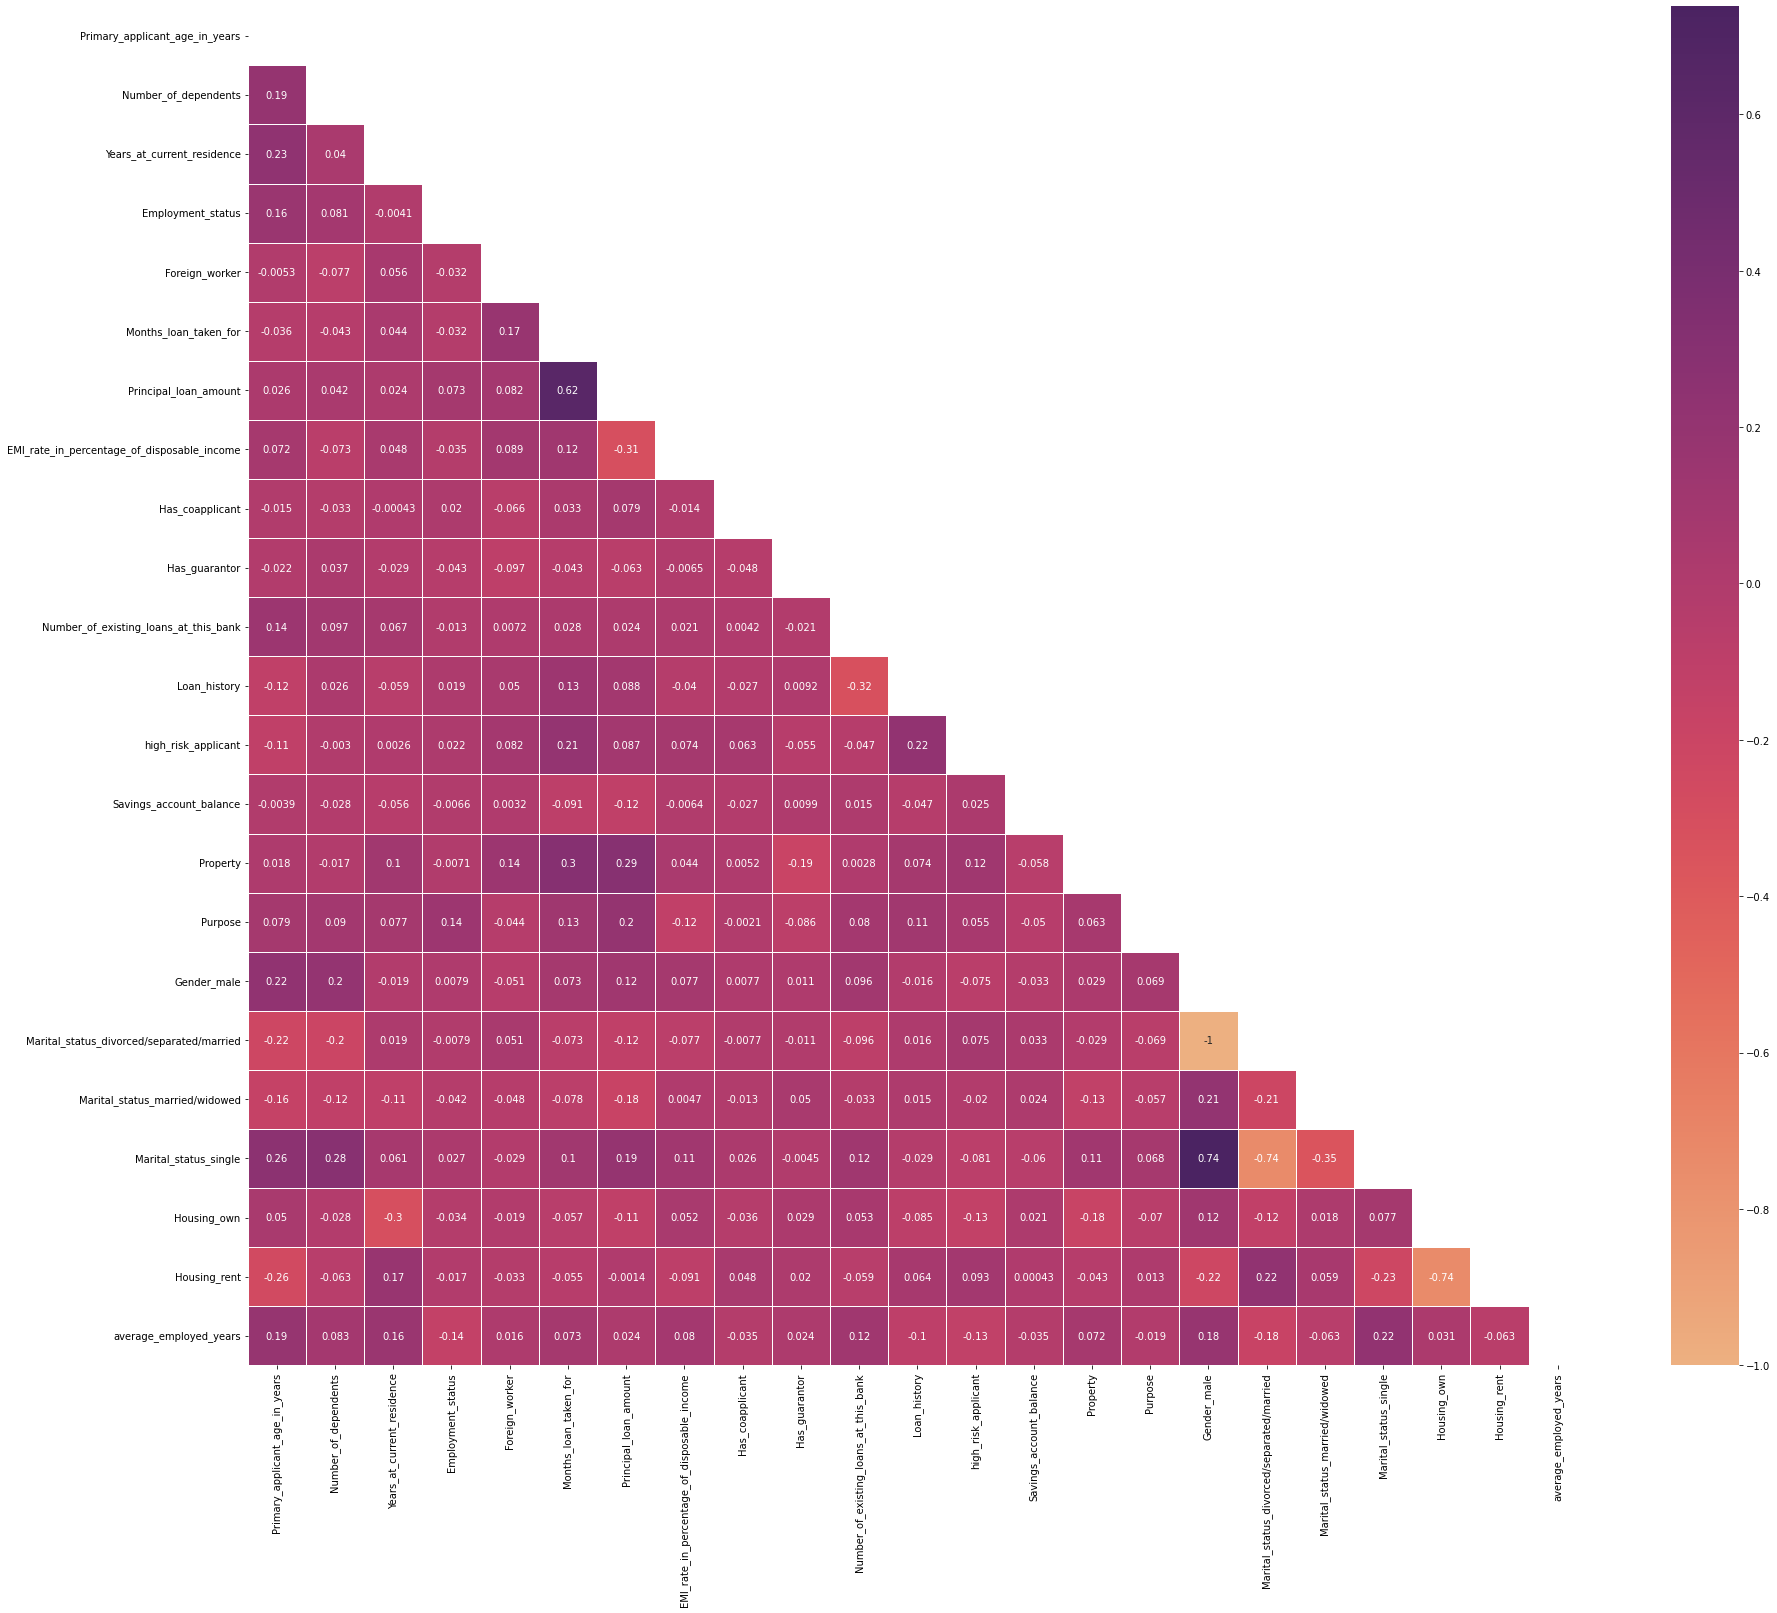

In [5]:
figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

## Some Conclusions Drawn

<li>Risk is directly affected by the applicants History.</li>
<li>Males have more people   dependant on them </li>
<li>There are more single males applying for loan😅</li>

#### Now we will be considering a lot of new features and see how they affect the target feature

1. Interest Paid

Interest paid = (Principal * number of years * Rate)/100

In [6]:
data.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'Loan_history', 'high_risk_applicant', 'Savings_account_balance',
       'Property', 'Purpose', 'Gender_male',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years'],
      dtype='object')

In [7]:
interest_paid = (data['EMI_rate_in_percentage_of_disposable_income']*data['Principal_loan_amount']*(data['Months_loan_taken_for']/12) )/100

In [8]:
interest_paid

0      0.279433
1      1.247926
2      0.291111
3      1.111606
4      0.923916
         ...   
995    0.431013
996    1.516540
997    0.543894
998    2.164199
999    1.725338
Length: 1000, dtype: float64

In [9]:
pearsonr(interest_paid, target)

(0.20893702094146974, 2.5116648655210183e-11)

Since, the correlation is suffieciently low we can add this column to our dataset 

In [10]:
data['interest_paid'] = interest_paid

Check Weather is is normally distributed

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_paid', ylabel='Density'>

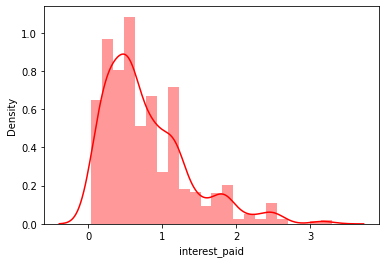

In [11]:
sns.distplot(data['interest_paid'], color = 'r')

In [12]:

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

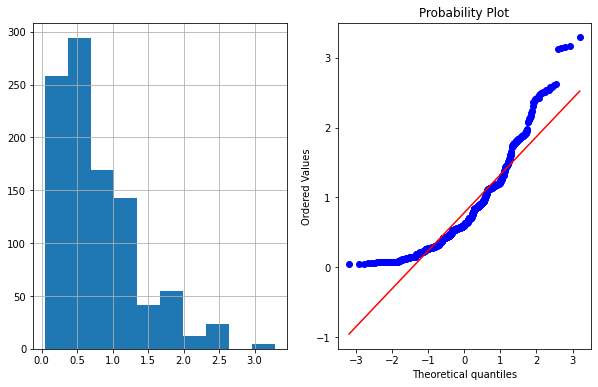

In [13]:
plot_data(data,'interest_paid' )

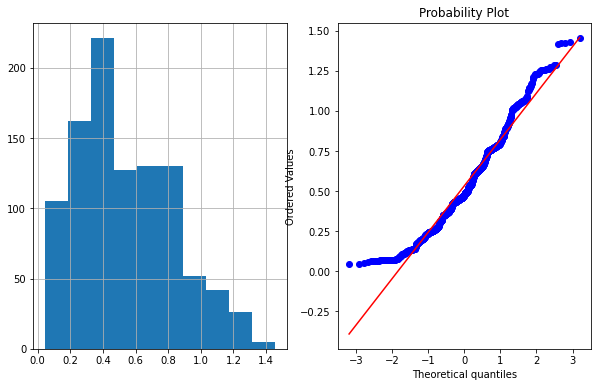

In [14]:
data['interest_paid'] = np.log1p(data['interest_paid'])
plot_data(data, 'interest_paid')

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_paid', ylabel='Density'>

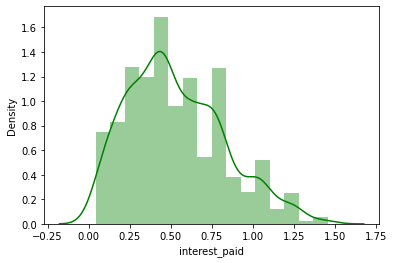

In [15]:
sns.distplot(data['interest_paid'], color = 'g')

Now it seems comparatively more normal, we can bring it to exact normal distribution by a series of log transformation but it would be prone to big statistical blunders

In [16]:
def plot_correlations_of_new_variable(new_var, df):
    corre = {}
    for i in df.columns:
        if i != new_var:
            coeff, p= pearsonr(df[new_var],df[i])
            corre[i]= coeff
    fig = plt.figure(figsize=(10, 5))
    
    values= [i for i in corre.values() if i >0.2 or i<-0.2]    
    keys = [key for key, value in corre.items() if value in values ]
    
        
    
    
    

   
   
# creating the bar plot
    sns.set(rc={'figure.figsize':(25,10)})
    sns.barplot(y = keys, x=values, palette="Blues_d").set(title = f'correlation against {new_var}')
    

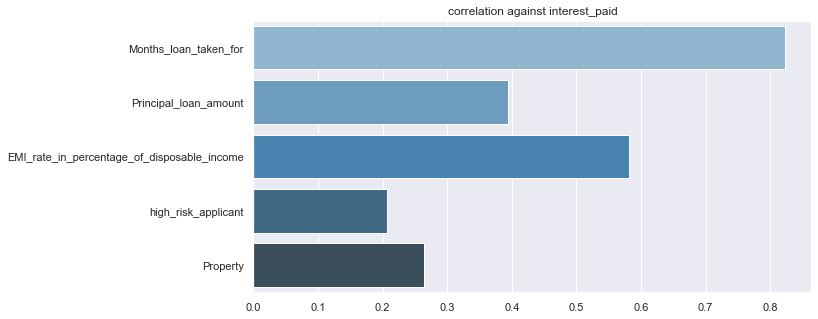

In [17]:
plot_correlations_of_new_variable('interest_paid', data)

As we can see the Parameters used to construct the feature are significnatly related to the interest and hence, these 3 columns can be easily removed.

In [18]:
data_with_interest = data.drop(['Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income'],axis = 1 )

In [19]:
data_with_interest

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Has_coapplicant  Has_guarantor  Number_of_existing_loans_at_this_bank  \
0                  0              0                                      2   
1                  0              0                                      1   
2                  0              0                                      1   
3                  0              1                                      1   
4                  0              0                                      2   
..               ...            ...                                    ...   
995                0              0                                      1   
996                0              0                                      1   
997                0              0                                      1   
998                0              0                                      1   
999                0              0                                      1   

     Loan_history  high_risk_applicant  ...  Property  Purpose  Gender_male  \
0               0                    0  ...         0        0            1   
1               1                    1  ...         0        0            0   
2               0                    0  ...         0        1            1   
3               1                    0  ...         1        2            1   
4               2                    1  ...         2        3            1   
..            ...                  ...  ...       ...      ...          ...   
995             1                    0  ...         0        2            0   
996             1                    0  ...         1        4            1   
997             1                    0  ...         2        0            1   
998             1                    1  ...         2        0            1   
999             0                    0  ...         2        4            1   

     Marital_status_divorced/separated/married  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
995                                          1   
996                                          0   
997                                          0   
998                                          

### Looking at some other Variables

In [20]:
data_with_interest.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years',
       'interest_paid'],
      dtype='object')

In [21]:
data_with_interest

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Has_coapplicant  Has_guarantor  Number_of_existing_loans_at_this_bank  \
0                  0              0                                      2   
1                  0              0                                      1   
2                  0              0                                      1   
3                  0              1                                      1   
4                  0              0                                      2   
..               ...            ...                                    ...   
995                0              0                                      1   
996                0              0                                      1   
997                0              0                                      1   
998                0              0                                      1   
999                0              0                                      1   

     Loan_history  high_risk_applicant  ...  Property  Purpose  Gender_male  \
0               0                    0  ...         0        0            1   
1               1                    1  ...         0        0            0   
2               0                    0  ...         0        1            1   
3               1                    0  ...         1        2            1   
4               2                    1  ...         2        3            1   
..            ...                  ...  ...       ...      ...          ...   
995             1                    0  ...         0        2            0   
996             1                    0  ...         1        4            1   
997             1                    0  ...         2        0            1   
998             1                    1  ...         2        0            1   
999             0                    0  ...         2        4            1   

     Marital_status_divorced/separated/married  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
995                                          1   
996                                          0   
997                                          0   
998                                          

<AxesSubplot:ylabel='Frequency'>

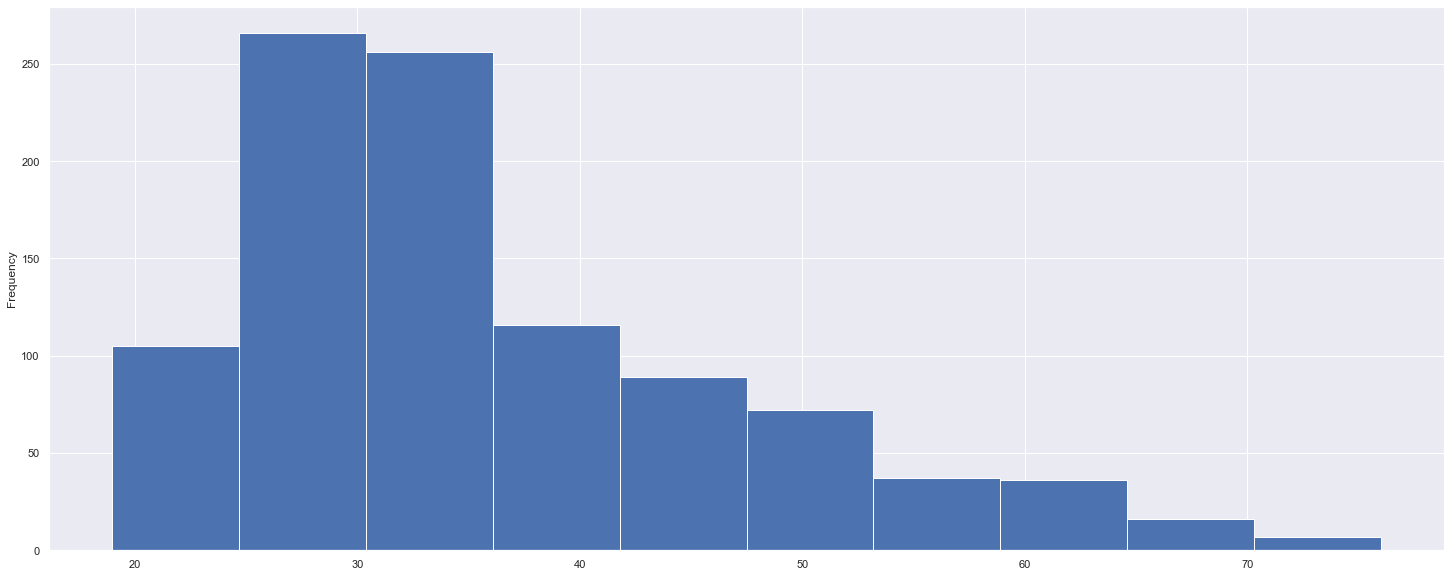

In [22]:
data_with_interest['Age'] = np.exp(data_with_interest['Primary_applicant_age_in_years']).astype('int')
data_with_interest['Age'].plot.hist()

<b>We will segment the applicants based upon various features  and check which type of people are more creditworthy</b>

#### Based Upon Age

In [23]:
is_young = []
for i in data_with_interest['Age']:
    if i >=60:
        is_young.append(0)
    else:is_young.append(1)
data_with_interest['is_young'] = is_young

Now we shall check how many young people have actually paid back loan

In [24]:
data_with_interest

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Has_coapplicant  Has_guarantor  Number_of_existing_loans_at_this_bank  \
0                  0              0                                      2   
1                  0              0                                      1   
2                  0              0                                      1   
3                  0              1                                      1   
4                  0              0                                      2   
..               ...            ...                                    ...   
995                0              0                                      1   
996                0              0                                      1   
997                0              0                                      1   
998                0              0                                      1   
999                0              0                                      1   

     Loan_history  high_risk_applicant  ...  Gender_male  \
0               0                    0  ...            1   
1               1                    1  ...            0   
2               0                    0  ...            1   
3               1                    0  ...            1   
4               2                    1  ...            1   
..            ...                  ...  ...          ...   
995             1                    0  ...            0   
996             1                    0  ...            1   
997             1                    0  ...            1   
998             1                    1  ...            1   
999             0                    0  ...            1   

     Marital_status_divorced/separated/married  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
995                                          1   
996                                          0   
997                                          0   
998                                          0   
999                                          0   

     Marital_status_married/widowed  Marital_status_single  Housing_own  \
0                                 0                      1            1   
1                     

In [25]:
def plot_pie_chart(df, title, label1 = 'Risky', label2= 'Creditworthy', feature = 'high_risk_applicant'):
    label = [label1, label2]
    colors = ['#0474a3', '#f3bc04']
    try:
        if len(df[feature].value_counts()) ==2:
                plt.pie(df[feature].value_counts(), labels=label,
                autopct='%1.1f%%', pctdistance=0.85, shadow= True, colors = colors)
        else:
                plt.pie(df[feature].value_counts(),
                autopct='%1.1f%%', pctdistance=0.85, shadow= True, colors = colors)
    except:
            print('Exception in plotting a pie chart')
           

    donut_plot = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    plt.title(title, fontdict={'size':20})
    fig.gca().add_artist(donut_plot)
    
    
    
    
def plot_pie_charts(dfs,  titles,  Title, label1 = 'Risky', label2= 'Creditworthy', feature = 'high_risk_applicant'):
        
        figure(figsize=(24, 16))
        for i in range(len(dfs)):
                if len(dfs) %2 ==0:
                        plt.subplot(2, 2, i+1)
                else:
                         plt.subplot(3, 3, i+1)
                plot_pie_chart(dfs[i], titles[i], label1, label2,  feature)
        plt.suptitle(Title, horizontalalignment = 'center', fontsize = 30)
                
                

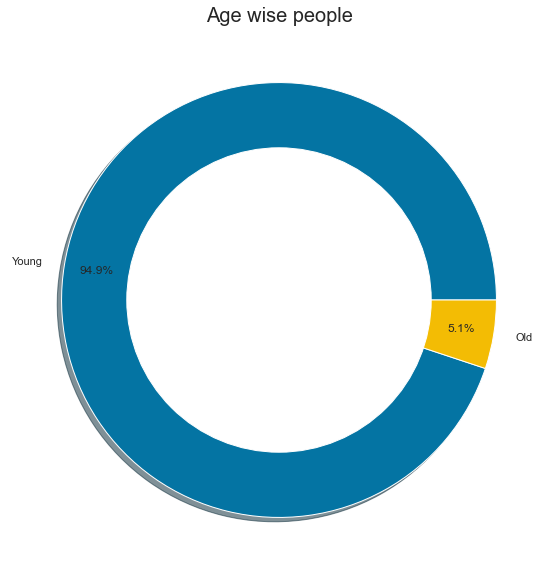

In [26]:
plot_pie_chart(data_with_interest, title= 'Age wise people', label1= 'Young', label2= 'Old', feature= 'is_young')

In [27]:
young_people = data_with_interest[data_with_interest['is_young'] ==1]
old_people = data_with_interest[data_with_interest['is_young'] ==0]

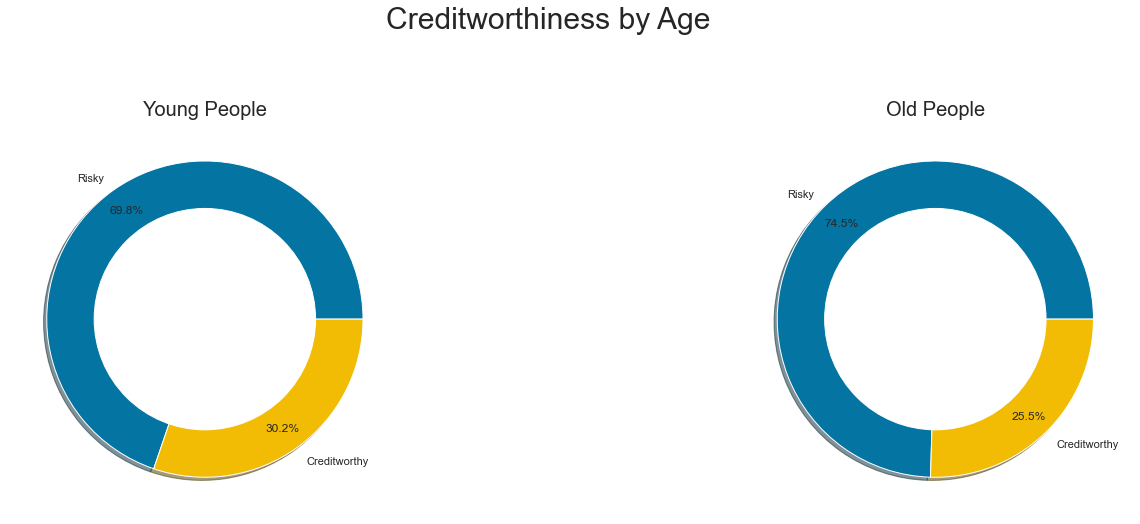

In [28]:
plot_pie_charts([young_people, old_people], ['Young People', 'Old People'], 'Creditworthiness by Age')

<b>From the Above Charts We can Conclude that Young peple are more creditworthy</b>

#### Based Upon Residence

In [29]:
foriegn_worker = data_with_interest[data_with_interest['Foreign_worker'] ==1]
Native_worker = data_with_interest[data_with_interest['Foreign_worker'] ==0]

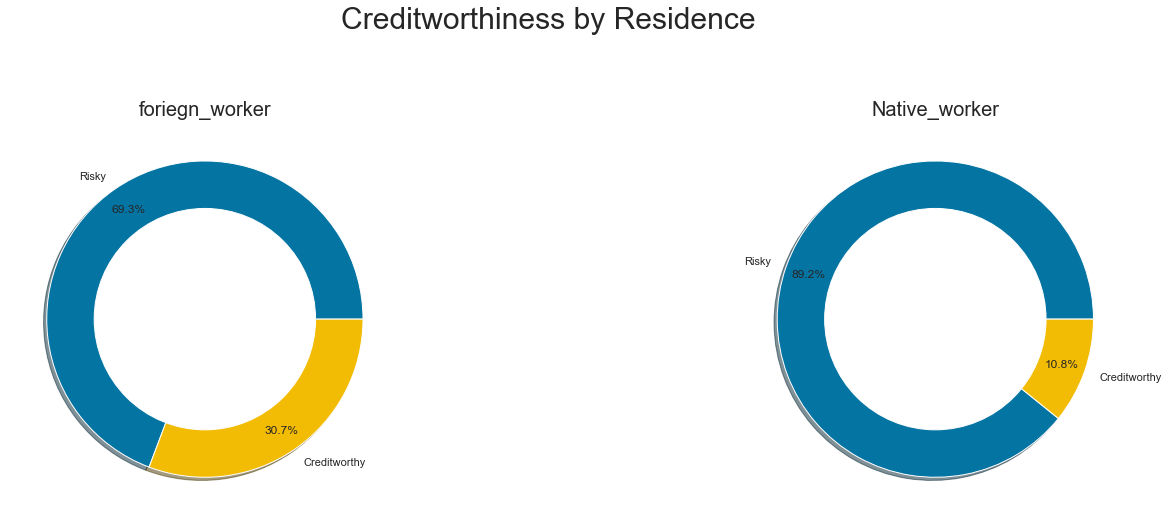

In [30]:
plot_pie_charts([foriegn_worker, Native_worker], ['foriegn_worker', 'Native_worker'], 'Creditworthiness by Residence')

<b>From the Above Charts We can Conclude that Foreign Workers are more creditworthy</b>

#### Based Upon Gurantor

In [31]:
has_gurantor = data_with_interest[data_with_interest['Has_guarantor'] ==1]
No_gurantor  = data_with_interest[data_with_interest['Has_guarantor'] ==0]

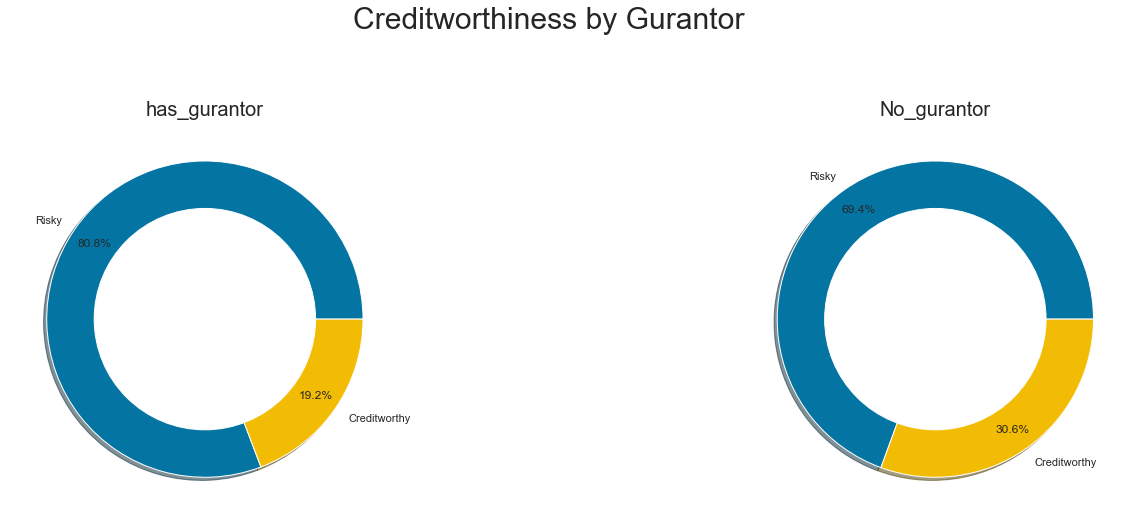

In [32]:
plot_pie_charts([has_gurantor , No_gurantor], ['has_gurantor', 'No_gurantor'], 'Creditworthiness by Gurantor')

#### Based Upon Number of Credit accounts

<b>From the Above Charts We can Conclude that people not having  Gurantors are more creditworthy</b>

<AxesSubplot:>

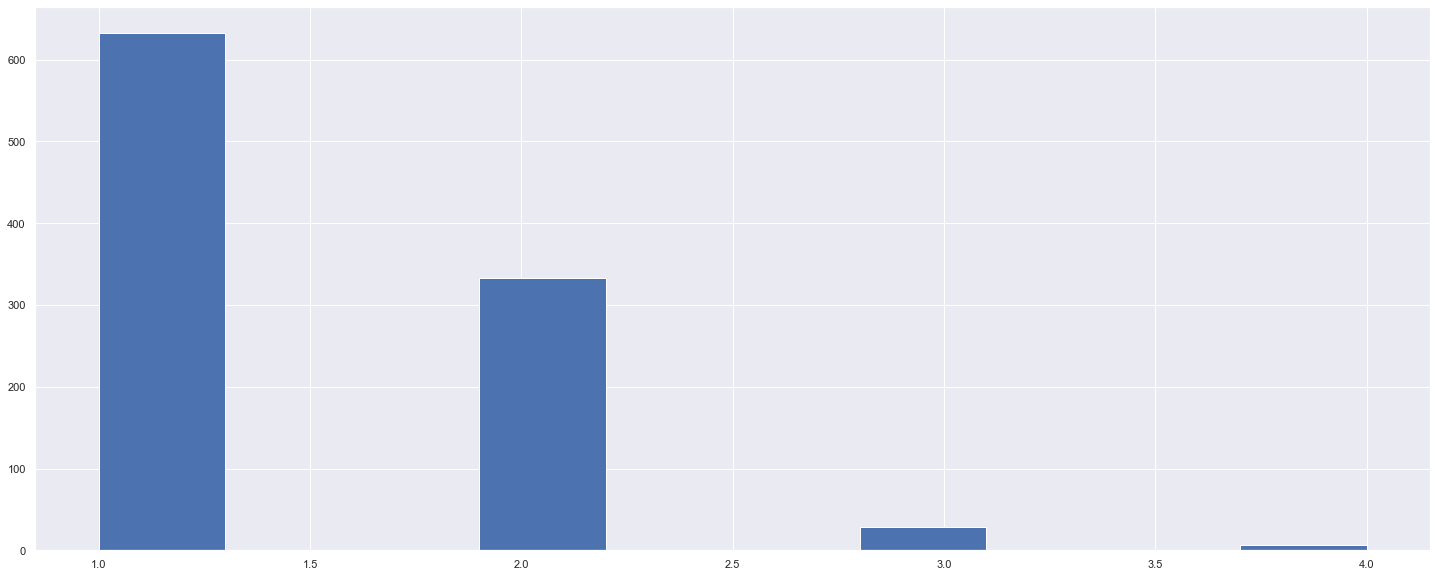

In [33]:
data_with_interest['Number_of_existing_loans_at_this_bank'].hist()

In [34]:
credit_accounts = []
titles = []
for i in range(1, 5):
    
   credit_accounts.append(data_with_interest[data_with_interest['Number_of_existing_loans_at_this_bank'] ==i])
   titles.append(f'Number of credit accounts {i}')

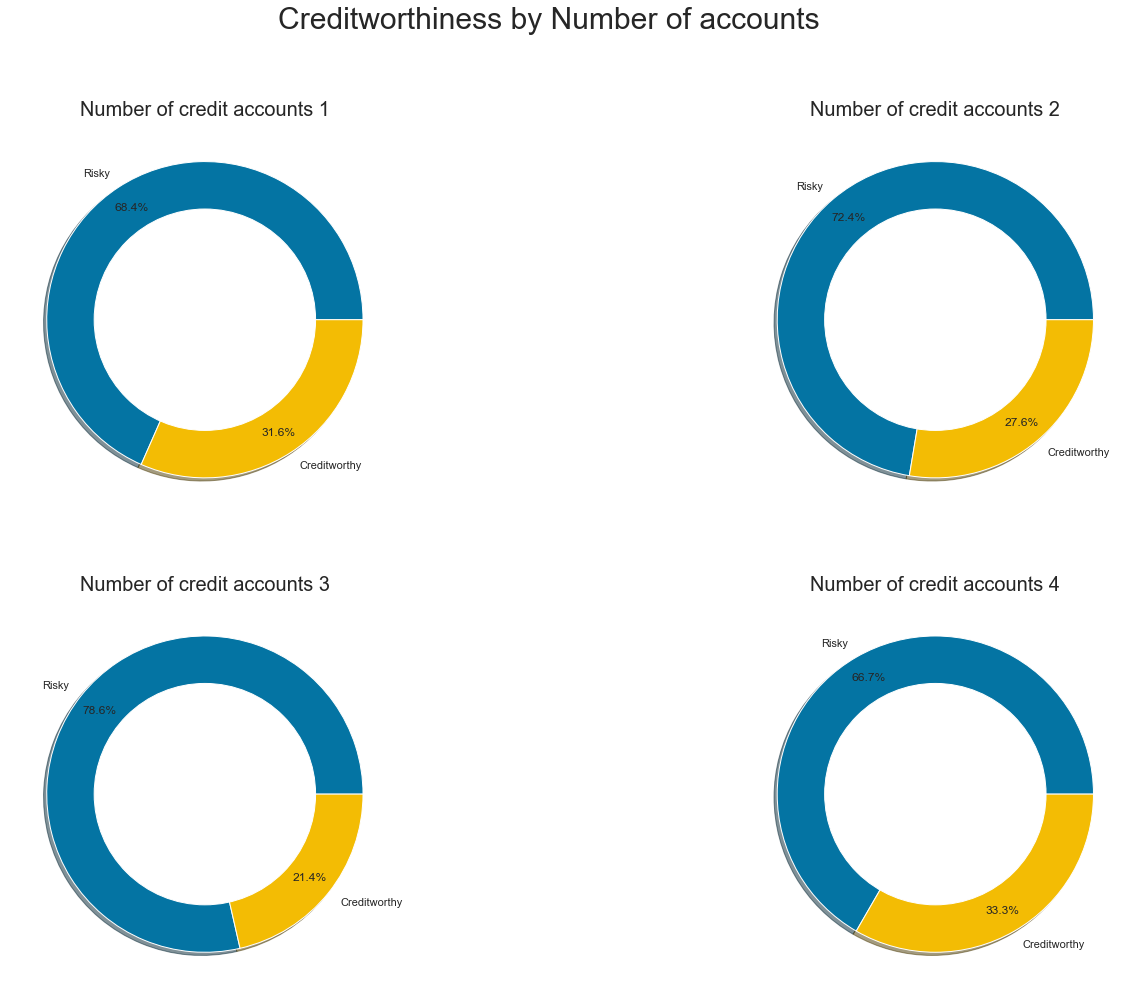

In [35]:
plot_pie_charts(credit_accounts, titles, 'Creditworthiness by Number of accounts')

<b> From the above charts we can conclude that people with lesser number of credit accounts are more creditworthy</b>

#### Based on credit history

In [36]:
with open('lables.json', 'r') as f:
    data1 = f.read()
decodedSet = jsonpickle.decode(data1)
decodedSet

'{"lables": [{"py/object": "pandas.core.indexes.base.Index", "_data": {"py/reduce": [{"py/function": "numpy.core.multiarray._reconstruct"}, {"py/tuple": [{"py/type": "numpy.ndarray"}, {"py/tuple": [0]}, {"py/b64": "Yg=="}]}, {"py/tuple": [1, {"py/tuple": [4]}, {"py/reduce": [{"py/type": "numpy.dtype"}, {"py/tuple": ["O8", false, true]}, {"py/tuple": [3, "|", null, null, null, -1, -1, 63]}]}, false, ["skilled employee / official", "unskilled - resident", "management / self-employed / highly qualified employee / officer", "unemployed / unskilled - non-resident"]]}]}, "_index_data": {"py/id": 3}, "_name": null, "_cache": {}, "_id": {"py/object": "builtins.object"}, "py/seq": ["skilled employee / official", "unskilled - resident", "management / self-employed / highly qualified employee / officer", "unemployed / unskilled - non-resident"]}, {"py/object": "pandas.core.indexes.base.Index", "_data": {"py/reduce": [{"py/function": "numpy.core.multiarray._reconstruct"}, {"py/tuple": [{"py/type":

In [37]:
history = ["critical/pending loans at other banks", "existing loans paid back duly till now", "delay in paying off loans in the past", "no loans taken/all loans paid back duly", "all loans at this bank paid back duly"]

From the above credit titltes we can conclude that histories with even index have a negative sentiment while with odd indexes have positive sentiment. Hence, we will segment the applicants on this parameter.

In [38]:
loan_histories= []
titles = []
for i in range(0, 4):
   loan_histories.append(data_with_interest[data_with_interest['Loan_history'] ==i])
   titles.append(history[i])

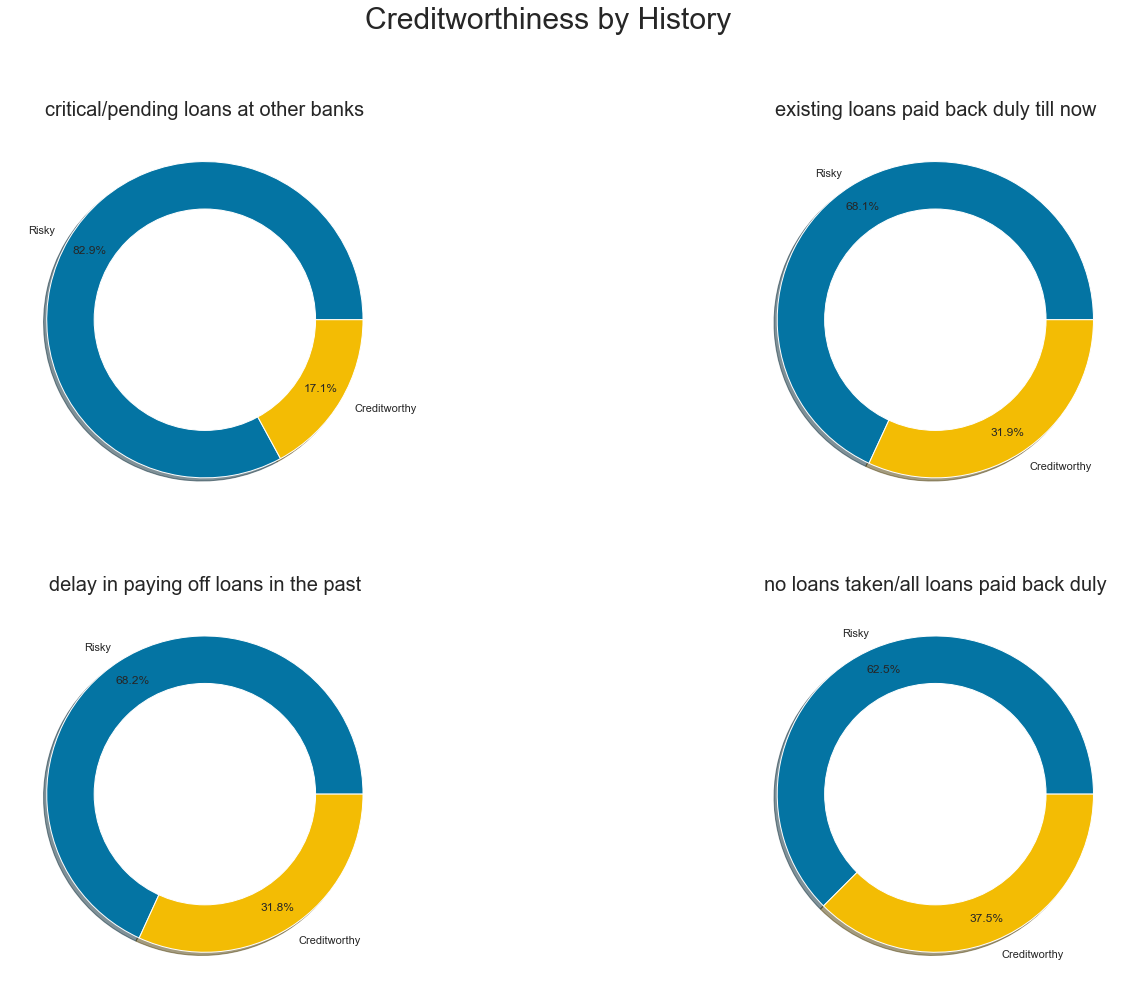

In [39]:
plot_pie_charts(loan_histories, titles, 'Creditworthiness by History')

<b>From the above charts we can conlcude that the loan history is also a significant feature and people who have pending loans with other banks must be avoided.</b>

#### 

#### Based upon Employement Status

In [40]:
status  =  ["skilled employee / official", "unskilled - resident", "management / self-employed / highly qualified employee / officer", "unemployed / unskilled - non-resident"]

employement_status= []
titles = []
for i in range(0, 4):
   employement_status.append(data_with_interest[data_with_interest['Employment_status'] ==i])
   titles.append(status[i])

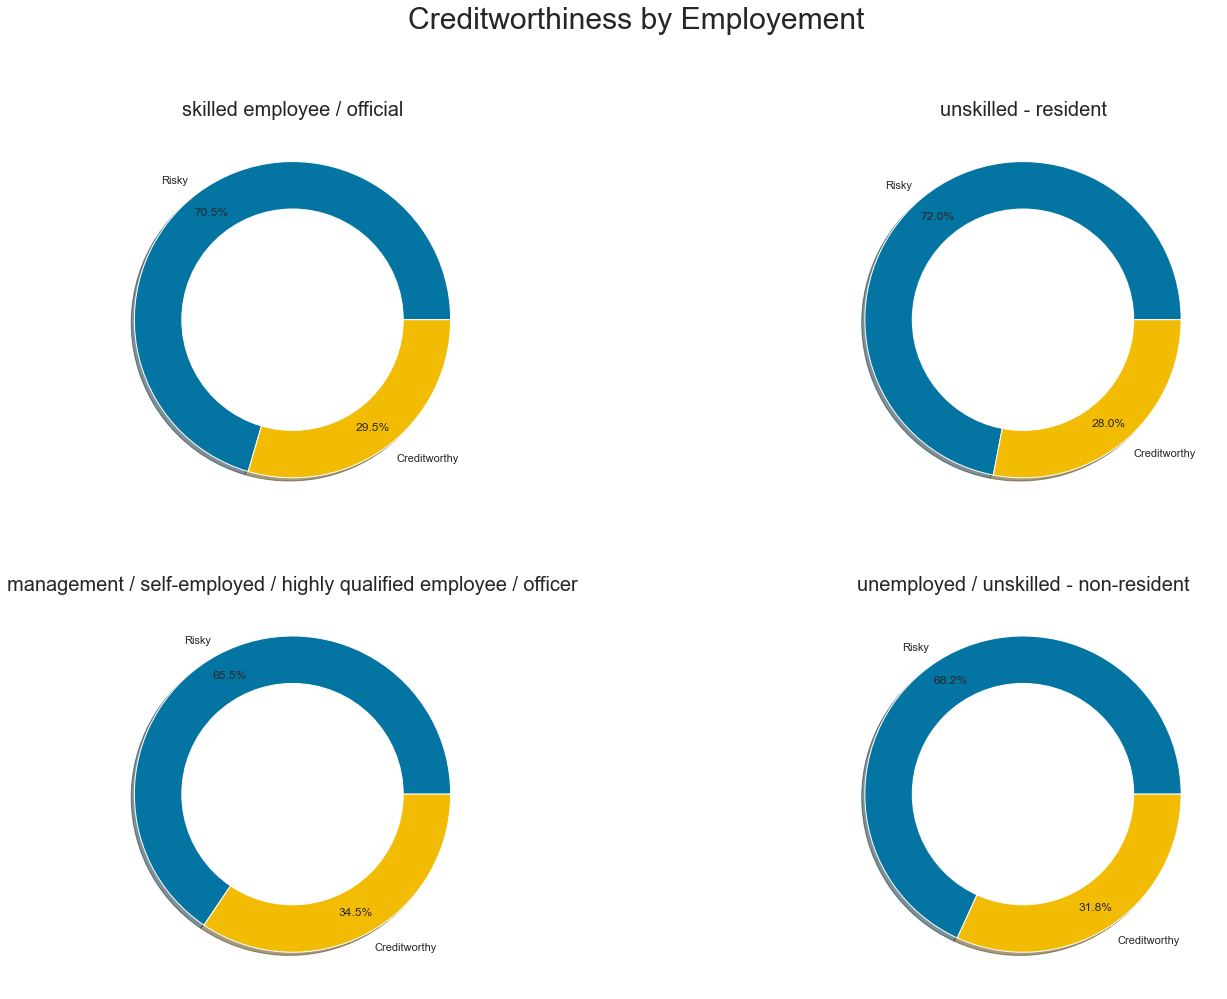

In [41]:
plot_pie_charts(employement_status, titles, 'Creditworthiness by Employement')

From the above chart we can conclude that Unskilled employees should be avoided since they are less creditworthy

#### Based upon Coapplicant

In [42]:
has_coapplicant= data_with_interest[data_with_interest['Has_coapplicant'] ==1]
no_copplicant = data_with_interest[data_with_interest['Has_coapplicant'] ==0]

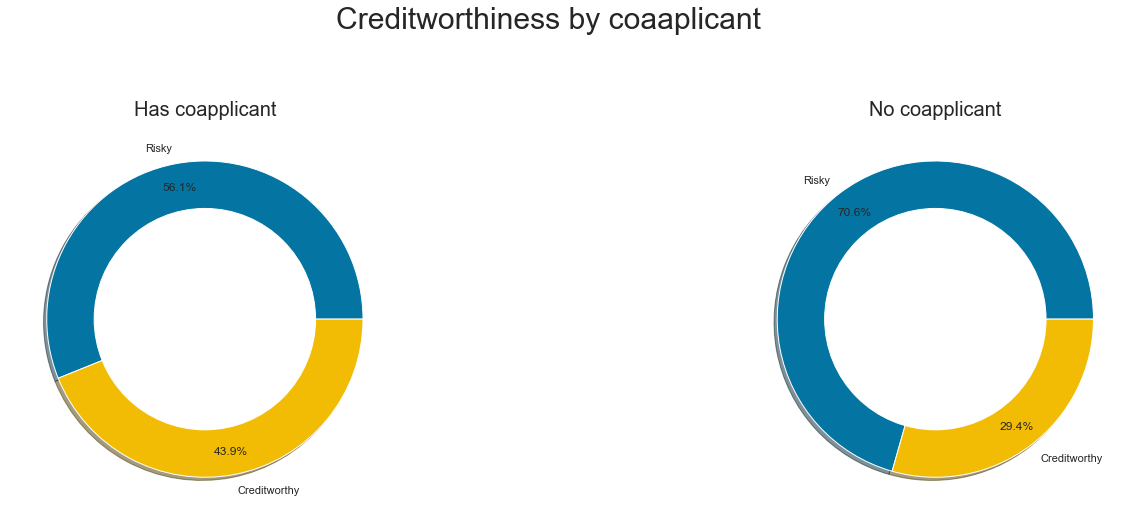

In [43]:
plot_pie_charts([has_coapplicant, no_copplicant],['Has coapplicant', 'No coapplicant'], 'Creditworthiness by coaaplicant')

<b>Hence, from above chart we can conclue that having a copplicnat is more creditoworthy</b>

#### Based upon Purpose

In [44]:
purposes= ["electronic equipment", "education", "FF&E", "new vehicle", "used vehicle", "business", "domestic appliances", "repair costs", "career development"]

Purpose = []
titles = []
for i in range(0, 9):
   Purpose.append(data_with_interest[data_with_interest['Purpose'] ==i])
   titles.append(purposes[i])

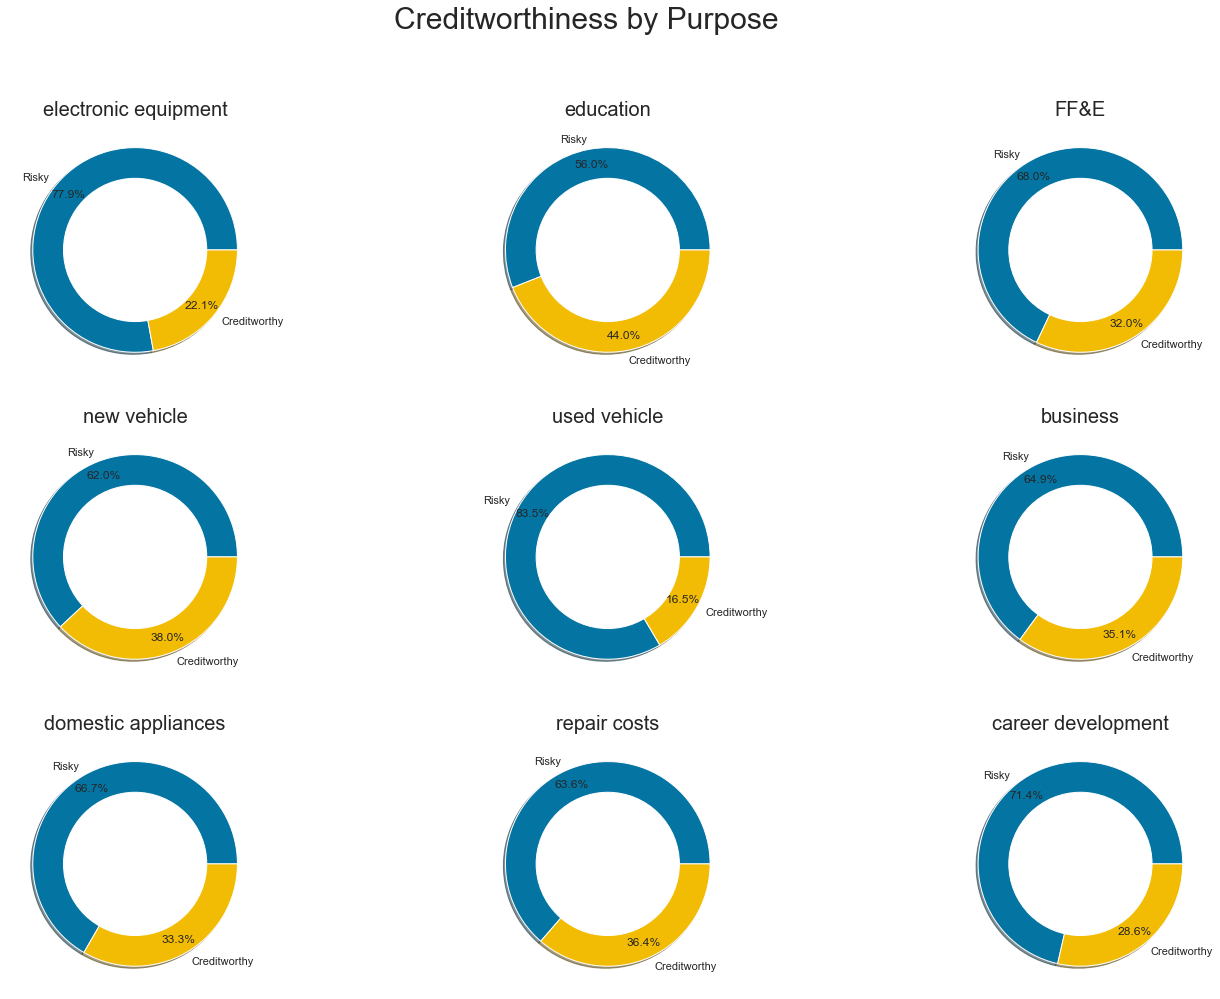

In [45]:
plot_pie_charts(Purpose , titles, 'Creditworthiness by Purpose')

<li>Education loans have the least probability of being default followed by new vehicle and loans taken for used vehicles, and electronics vehicle are at higher risks<li>

## Conclusions

<li>Education loans have the least probability of being default followed by new vehicle and loans taken for used vehicles, and electronics vehicle are at higher risks</li>

<li>Unskilled employees should be avoided since they are less creditworthy</li>

<li>The loan history is also a significant feature and people who have pending loans with other banks must be avoided.</li>

<li>As you can see High risk is  related to interest paid and longer loan duration. Hence, we can conlclude that giving loan with higher interests or for longer duration increases the risk.</li>

<li>Young people tend to take more loans and are more creditworthy than old people.</li>

<li> Having a copplicnat is more creditoworthy</li>
<li>Foriegn Workers are more creditwohthy as compared to native workers.</li>

<li>Surprisingly, People <b>not</b> having gurantor are more aslo more creditoworthy.</li>

<li> People with lesser number of credit accounts are more creditworthy</li>



### Credit score derivation

From the above conclusions we cab derive something like credit score, which we consider all above points. The credit score will be responsible parameter for deciding the approval of the application

Credit score = [Loan Purpose +  skilled + good history + comparratively shorter duration + young + foreign worker - gurantor + no. of credit accounts + has_copplicant]

<li> if loan purpose is in top 4 most creditworthy purposes we will add one to credit score</li>
<li> if the applicant is skilled we will add one point</li>
<li> Loan history gets 1 point</li>
<li>similarly we add other parameters</li>
<li>since gurantor is inversly prpotional we will substract it.</li>


In [46]:
purpose_credit  = []
skill_credit    = []
history_credit  = []
duration_credit = []
for i in data_with_interest['Purpose']:
    if i < 4:
        purpose_credit.append(1)
    else:
        purpose_credit.append(0)   

for i in data_with_interest['Employment_status']:
    if i == 1:
        skill_credit.append(1)
    else:
        skill_credit.append(0)   
        
for i in data_with_interest['Loan_history']:
    if i%2 ==  0:
        history_credit.append(1)
    else:
        history_credit.append(0)   
for i in data['Months_loan_taken_for']:
    if i<50:
        duration_credit.append(1)
    else:
        duration_credit.append(0) 

data_with_interest['purpose_credit'] = purpose_credit
data_with_interest['skill_credit'] = skill_credit
data_with_interest['history_credit'] = history_credit
data_with_interest['duration_credit'] = duration_credit

In [47]:
data_with_interest['credit_score'] = data_with_interest['purpose_credit']  + data_with_interest['skill_credit']    + data_with_interest['history_credit'] + data_with_interest['duration_credit']  + data_with_interest['is_young'] - data_with_interest['Has_guarantor'] + data_with_interest['Number_of_existing_loans_at_this_bank']  + data_with_interest['Has_coapplicant']


In [48]:
data_with_interest

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Has_coapplicant  Has_guarantor  Number_of_existing_loans_at_this_bank  \
0                  0              0                                      2   
1                  0              0                                      1   
2                  0              0                                      1   
3                  0              1                                      1   
4                  0              0                                      2   
..               ...            ...                                    ...   
995                0              0                                      1   
996                0              0                                      1   
997                0              0                                      1   
998                0              0                                      1   
999                0              0                                      1   

     Loan_history  high_risk_applicant  ...  Housing_rent  \
0               0                    0  ...             0   
1               1                    1  ...             0   
2               0                    0  ...             0   
3               1                    0  ...             0   
4               2                    1  ...             0   
..            ...                  ...  ...           ...   
995             1                    0  ...             0   
996             1                    0  ...             0   
997             1                    0  ...             0   
998             1                    1  ...             0   
999             0                    0  ...             0   

     average_employed_years  interest_paid  Age  is_young  purpose_credit  \
0                  1.609438       0.246417   68         0               1   
1                  1.252763       0.810008   23         1               1   
2                  1.871802       0.255503   49         1               1   
3                  1.871802       0.747449   46         1               1   
4                  1.252763       0.654363   54         1               1   
..                      ...            ...  ...       ...             ...   
995                1.871802       0.358382   32         1               1   
996                1.252763       0.922885   41         1               0   
997                1.609438       0.434308   38         1           

Deleting all the unnecessary columns created 

In [49]:
data_with_interest.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years',
       'interest_paid', 'Age', 'is_young', 'purpose_credit', 'skill_credit',
       'history_credit', 'duration_credit', 'credit_score'],
      dtype='object')

In [50]:
data_with_credit_score = data_with_interest.drop(['Age', 'is_young', 'purpose_credit', 'skill_credit',
       'history_credit', 'duration_credit'], axis = 1)

Observing the Credit Score

In [51]:
data_with_credit_score 

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Has_coapplicant  Has_guarantor  Number_of_existing_loans_at_this_bank  \
0                  0              0                                      2   
1                  0              0                                      1   
2                  0              0                                      1   
3                  0              1                                      1   
4                  0              0                                      2   
..               ...            ...                                    ...   
995                0              0                                      1   
996                0              0                                      1   
997                0              0                                      1   
998                0              0                                      1   
999                0              0                                      1   

     Loan_history  high_risk_applicant  ...  Purpose  Gender_male  \
0               0                    0  ...        0            1   
1               1                    1  ...        0            0   
2               0                    0  ...        1            1   
3               1                    0  ...        2            1   
4               2                    1  ...        3            1   
..            ...                  ...  ...      ...          ...   
995             1                    0  ...        2            0   
996             1                    0  ...        4            1   
997             1                    0  ...        0            1   
998             1                    1  ...        0            1   
999             0                    0  ...        4            1   

     Marital_status_divorced/separated/married  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
995                                          1   
996                                          0   
997                                          0   
998                                          0   
999                                          0   

     Marital_status_married/widowed  Marital_status_single  Hous

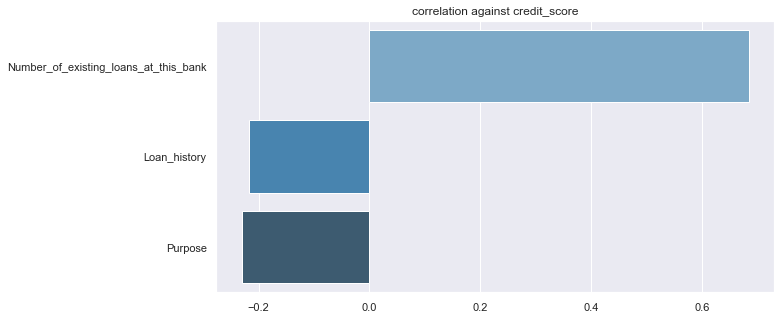

In [52]:
plot_correlations_of_new_variable('credit_score', data_with_credit_score )

We will remove the number of existing loans cols 

In [53]:
data_with_credit_score = data_with_credit_score.drop(['Number_of_existing_loans_at_this_bank'] , axis = 1)

In [54]:
data_with_credit_score

Primary_applicant_age_in_years  Number_of_dependents  \
0                          4.219508                     1   
1                          3.135494                     1   
2                          3.912023                     2   
3                          3.828641                     2   
4                          3.988984                     2   
..                              ...                   ...   
995                        3.465736                     1   
996                        3.713572                     1   
997                        3.663562                     1   
998                        3.178054                     1   
999                        3.332205                     1   

     Years_at_current_residence  Employment_status  Foreign_worker  \
0                             4                  0               1   
1                             2                  0               1   
2                             3                  1               1   
3                             4                  0               1   
4                             4                  0               1   
..                          ...                ...             ...   
995                           4                  1               1   
996                           4                  2               1   
997                           4                  0               1   
998                           4                  0               1   
999                           4                  0               1   

     Has_coapplicant  Has_guarantor  Loan_history  high_risk_applicant  \
0                  0              0             0                    0   
1                  0              0             1                    1   
2                  0              0             0                    0   
3                  0              1             1                    0   
4                  0              0             2                    1   
..               ...            ...           ...                  ...   
995                0              0             1                    0   
996                0              0             1                    0   
997                0              0             1                    0   
998                0              0             1                    1   
999                0              0             0                    0   

     Savings_account_balance  ...  Purpose  Gender_male  \
0                          0  ...        0            1   
1                          1  ...        0            0   
2                          1  ...        1            1   
3                          1  ...        2            1   
4                          1  ...        3            1   
..                       ...  ...      ...          ...   
995                        1  ...        2            0   
996                        1  ...        4            1   
997                        1  ...        0            1   
998                        1  ...        0            1   
999                        0  ...        4            1   

     Marital_status_divorced/separated/married  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
995                                          1   
996                                          0   
997                                          0   
998                                          0   
999                                          0   

     Marital_status_married/widowed  Marital_status_single  Housing_own  \
0                                 0                      1            1   
1                                 0                      0            1   
2      

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_score', ylabel='Density'>

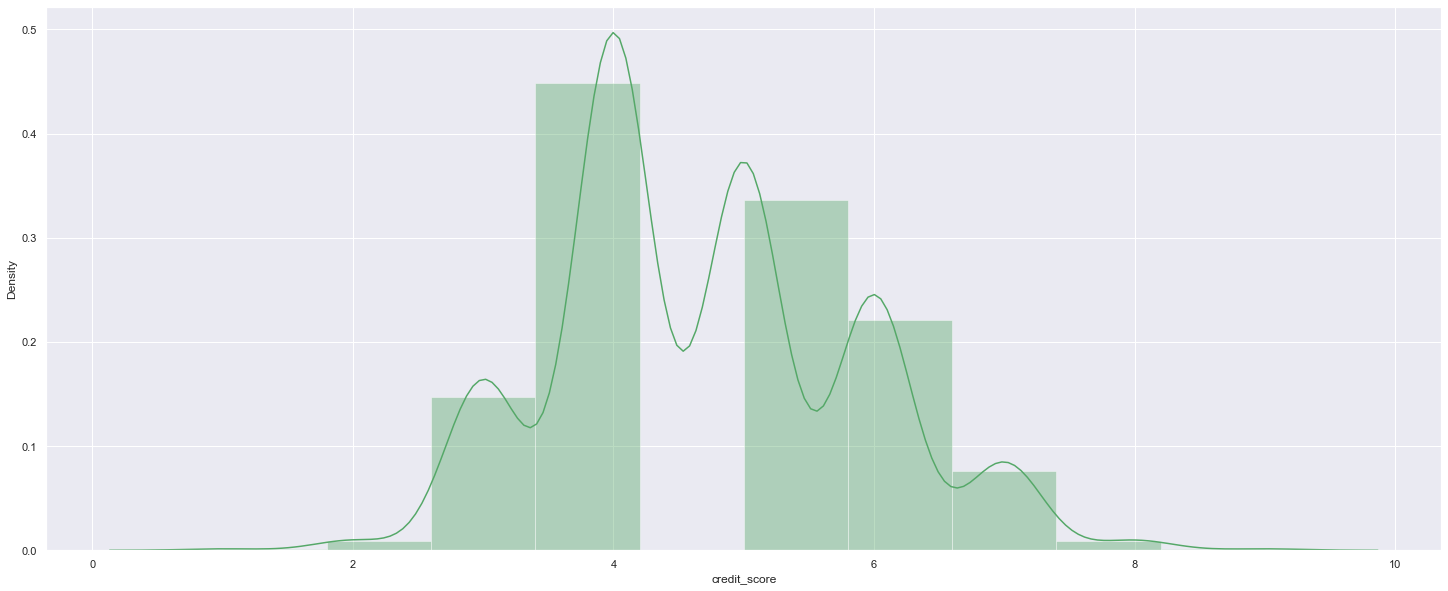

In [55]:
sns.distplot(data_with_credit_score['credit_score'], color = 'g', bins = 10)

It already seems to be normally distributed

### Hence, we derieved 2 columns Interest and Credit score and are now proceeding towards Model Creation

In [56]:
data_with_credit_score.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years',
       'interest_paid', 'credit_score'],
      dtype='object')

In [57]:
ordinal = ['Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', ]
for i in ordinal:
       data_with_credit_score[i] = data_with_credit_score[i].astype('object')

In [58]:
data_with_credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Primary_applicant_age_in_years             1000 non-null   float64
 1   Number_of_dependents                       1000 non-null   int64  
 2   Years_at_current_residence                 1000 non-null   int64  
 3   Employment_status                          1000 non-null   object 
 4   Foreign_worker                             1000 non-null   object 
 5   Has_coapplicant                            1000 non-null   object 
 6   Has_guarantor                              1000 non-null   object 
 7   Loan_history                               1000 non-null   object 
 8   high_risk_applicant                        1000 non-null   object 
 9   Savings_account_balance                    1000 non-null   object 
 10  Property                 

In [59]:
data_with_credit_score.to_csv('Data/Preprocessed/final.csv', index= False)

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr   
from lazypredict.Supervised import LazyClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.metrics import precision_recall_curve
import pylab 
import jsonpickle
import json


In [2]:
data = pd.read_csv('Data/Preprocessed/final.csv')

## 1. Feature Selection 

#### Looking for low variance features

In [3]:

var_thres=VarianceThreshold(threshold=0.0)
var_thres.fit(data)


VarianceThreshold()

No columns has suffieciintly low variance

### Looking for correlations

<AxesSubplot:>

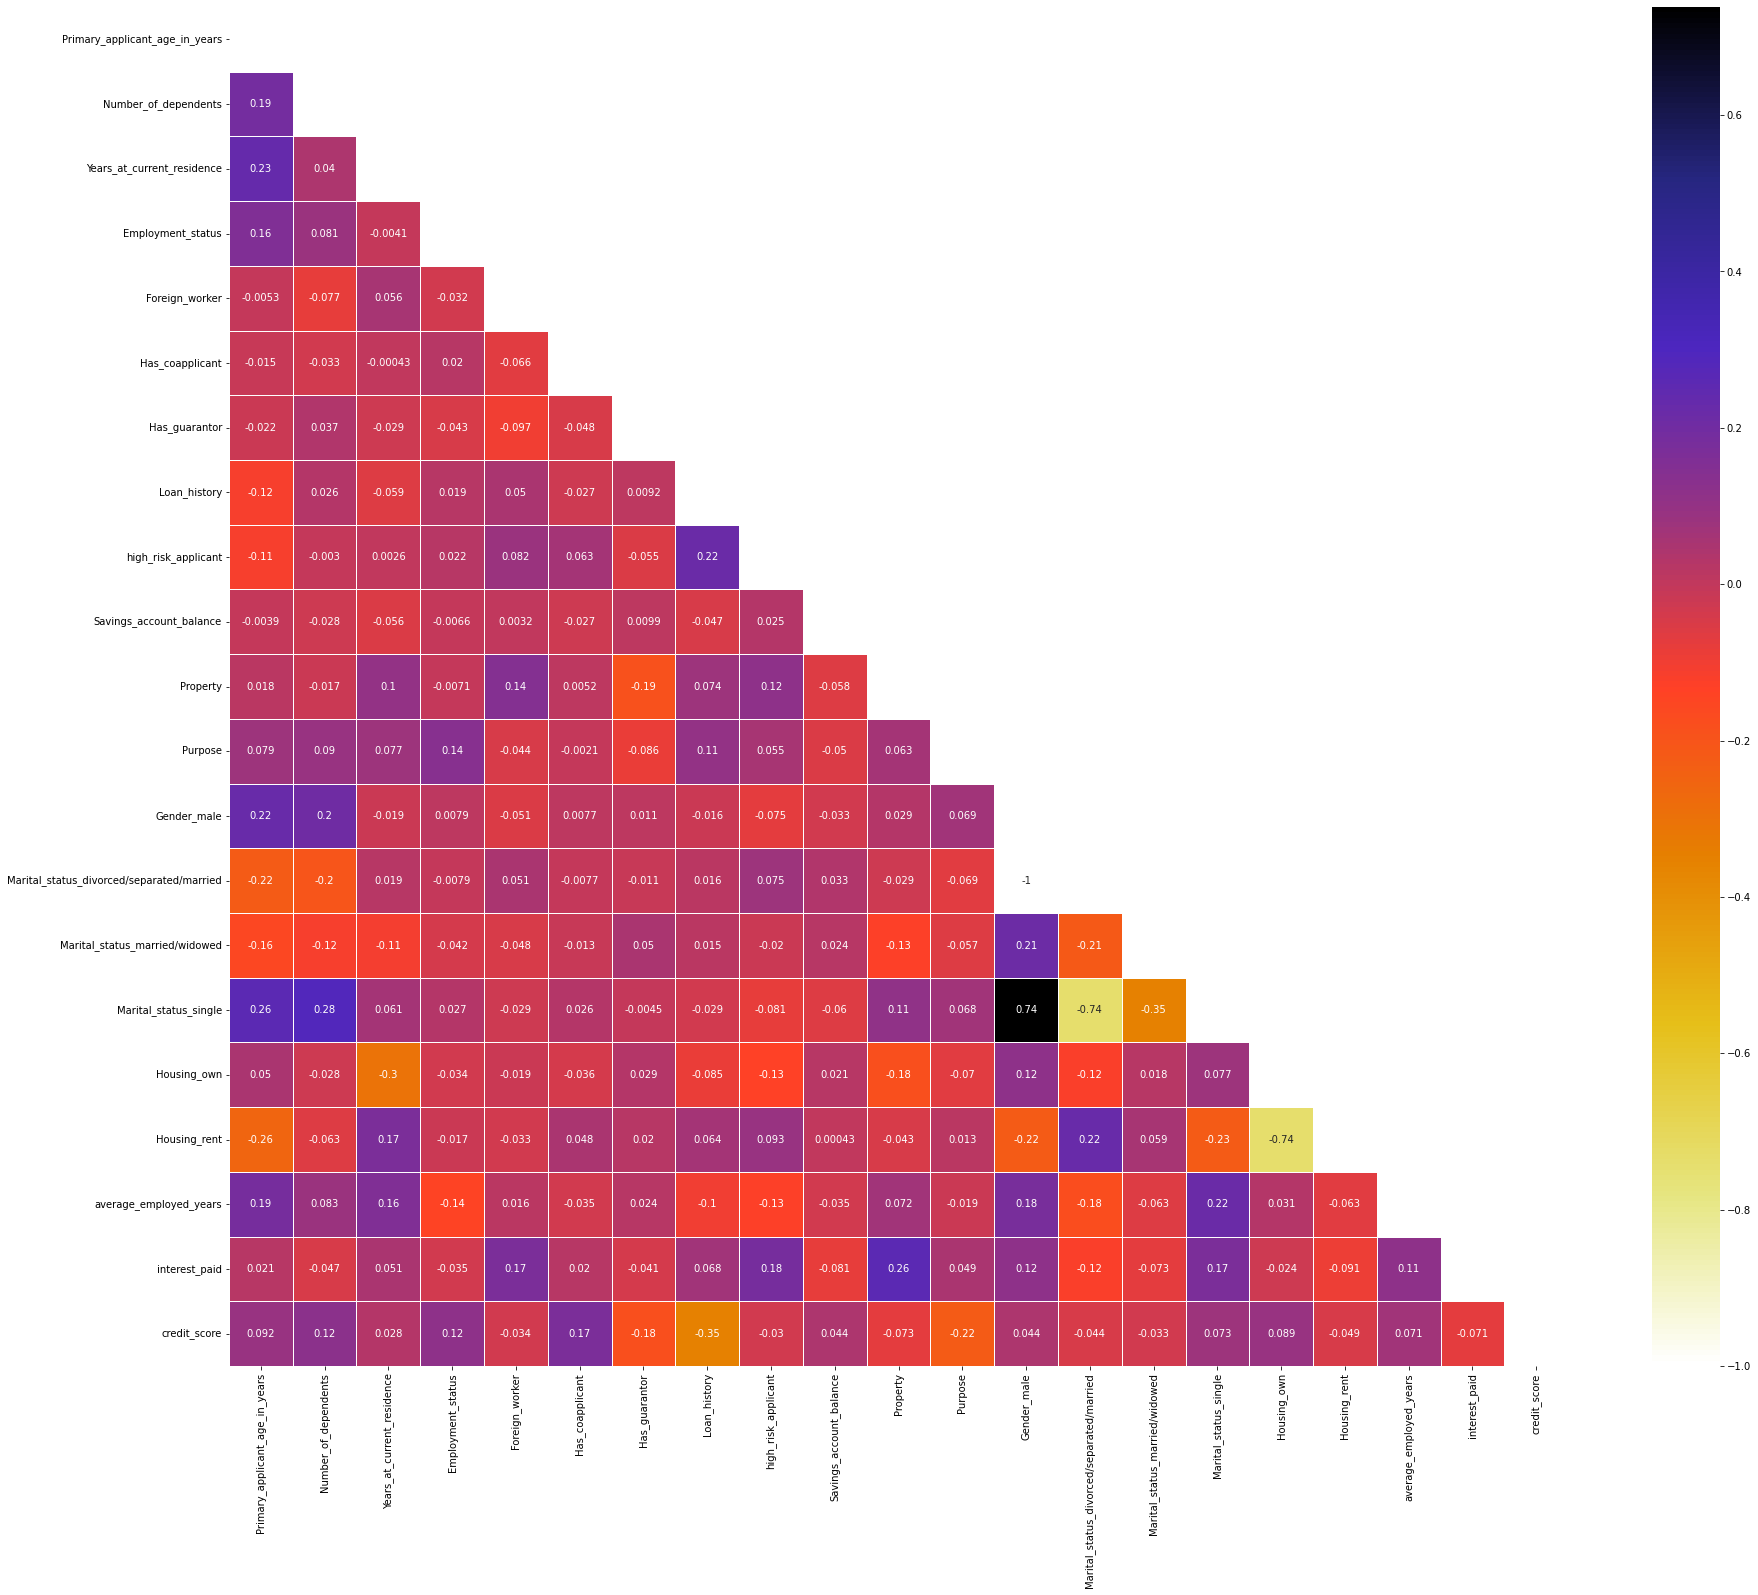

In [4]:
figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap=plt.cm.CMRmap_r, linewidths=.5, mask=mask)

From the above chart we can infer that the features (except for the one hot encodings)  are not much significantly correlated

### Using Mututal Info Classifier

In [5]:

# determine the mutual information
X= data[data.columns.drop('high_risk_applicant')]
Y = data['high_risk_applicant']
mutual_info = pd.Series(mutual_info_classif(X, Y))

In [6]:
cols = X.columns

In [7]:
data.shape

(1000, 21)

In [8]:
mi_score_selected_index = np.where(mutual_info >0.0)[0]
mi_score_selected_index

imp_cols = [cols[i] for i in mi_score_selected_index ]
imp_cols 
    

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Employment_status',
 'Foreign_worker',
 'Has_guarantor',
 'Loan_history',
 'Savings_account_balance',
 'Property',
 'Purpose',
 'Gender_male',
 'Marital_status_divorced/separated/married',
 'Marital_status_married/widowed',
 'Marital_status_single',
 'interest_paid']

<AxesSubplot:>

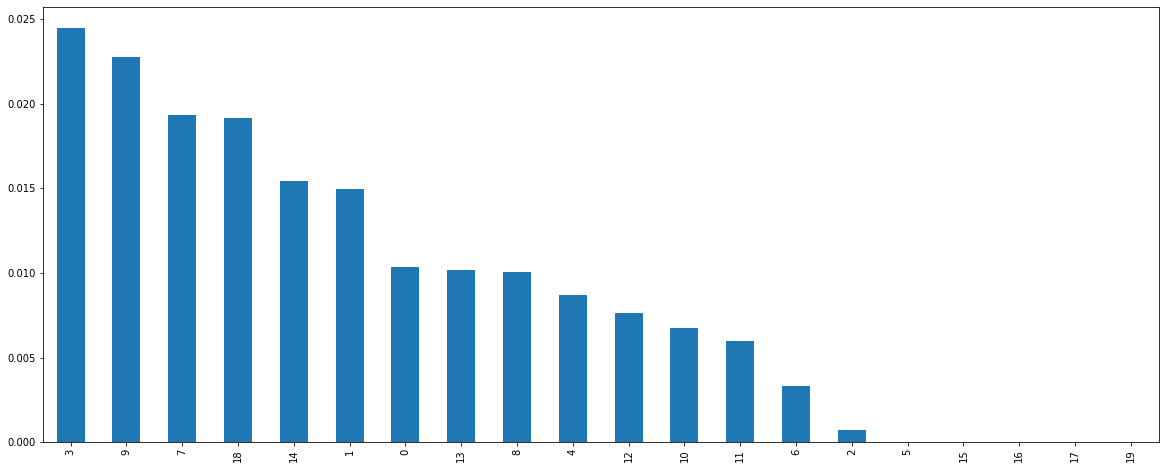

In [9]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [10]:
train_x, test_x,train_y, test_y = train_test_split(X[imp_cols],Y, shuffle = True, stratify=Y)

In [11]:
clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(train_x, test_x,train_y, test_y)

 93%|█████████▎| 27/29 [00:02<00:00, 12.43it/s]

[11:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:04<00:00,  7.02it/s]


In [12]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.64               0.66     0.66      0.66   
NearestCentroid                    0.64               0.66     0.66      0.65   
QuadraticDiscriminantAnalysis      0.58               0.61     0.61      0.60   
BernoulliNB                        0.72               0.60     0.60      0.69   
NuSVC                              0.70               0.60     0.60      0.68   
ExtraTreesClassifier               0.70               0.60     0.60      0.68   
LogisticRegression                 0.72               0.59     0.59      0.69   
RandomForestClassifier             0.72               0.59     0.59      0.69   
LinearDiscriminantAnalysis         0.72               0.59     0.59      0.68   
XGBClassifier                      0.68               0.59     0.59      0.67   
BaggingClassifier                  0.70               0.59     0.59      0.68   
AdaBoostClassifier                 0.69               0.58     0.58      0.67   
LabelPropagation                   0.63               0.58     0.58      0.64   
LabelSpreading                     0.63               0.58     0.58      0.64   
LGBMClassifier                     0.69               0.58     0.58      0.67   
ExtraTreeClassifier                0.61               0.57     0.57      0.62   
KNeighborsClassifier               0.65               0.56     0.56      0.64   
PassiveAggressiveClassifier        0.61               0.56     0.56      0.62   
RidgeClassifier                    0.71               0.56     0.56      0.66   
RidgeClassifierCV                  0.71               0.56     0.56      0.66   
LinearSVC                          0.71               0.56     0.56      0.66   
SVC                                0.72               0.56     0.56      0.66   
CalibratedClassifierCV             0.71               0.56     0.56      0.65   
DecisionTreeClassifier             0.58               0.52     0.52      0.59   
SGDClassifier                      0.66               0.52     0.52      0.61   
DummyClassifier                    0.70               0.50     0.50      0.58   
Perceptron                         0.60               0.50     0.50      0.59   

                               Time Taken  
Model                                      
GaussianNB                           0.02  
NearestCentroid                      0.03  
QuadraticDiscriminantAnalysis        0.02  
BernoulliNB                          0.02  
NuSVC                                0.11  
ExtraTreesClassifier                 0.43  
LogisticRegression                   0.07  
RandomForestClassifier               0.46  
LinearDiscriminantAnalysis           0.05  
XGBClassifier                        1.14  
BaggingClassifier                    0.10  
AdaBoostClassifier                   0.24  
LabelPropagation                     0.09  
LabelSpreading                       0.10  
LGBMClassifier                       0.18  
ExtraTreeClassifier                  0.04  
KNeighborsClassifier                 0.06  
PassiveAggressiveClassifier          0.02  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.04  
LinearSVC                            0.17  
SVC                                  0.11  
CalibratedClassifierCV               0.44  
DecisionTreeClassifier               0.04  
SGDClassifier                        0.03  
DummyClassifier                      0.03  
Perceptron                           0.02

### Using Select KBEST

In [13]:
ks = [i for i in range(5, 20)]

sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X, Y)
top10 = list(X.columns[sel_five_cols.get_support()])

x = X[top10]

In [14]:
k_wise_scores = []
for i in ks:
    sel_five_cols = SelectKBest(mutual_info_classif, k=i)
    sel_five_cols.fit(X, Y)
    top_k = list(X.columns[sel_five_cols.get_support()])
    x = X[top_k]
    train_x, test_x,train_y, test_y = train_test_split(x,Y, shuffle = True, stratify=Y)
    clf = LazyClassifier(predictions=True)
    models, predictions = clf.fit(train_x, test_x,train_y, test_y)
    k_wise_scores.append(models['Balanced Accuracy'][0])
    

 97%|█████████▋| 28/29 [00:02<00:00, 13.49it/s]

[11:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:01<00:00, 15.98it/s]

[11:44:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:01<00:00, 15.13it/s]

[11:44:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:01<00:00, 15.81it/s]

[11:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:01<00:00, 15.41it/s]

[11:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:02<00:00, 14.58it/s]

[11:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:02<00:00, 13.37it/s]

[11:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:02<00:00, 14.20it/s]

[11:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:02<00:00, 13.81it/s]

[11:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:01<00:00, 15.02it/s]

[11:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:02<00:00, 13.39it/s]

[11:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:02<00:00, 12.56it/s]

[11:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 93%|█████████▎| 27/29 [00:02<00:00, 14.24it/s]

[11:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████▉ | 26/29 [00:02<00:00, 12.95it/s]

[11:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 93%|█████████▎| 27/29 [00:02<00:00, 12.41it/s]

[11:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:03<00:00,  8.90it/s]


Text(0, 0.5, 'Best Model Accuracy')

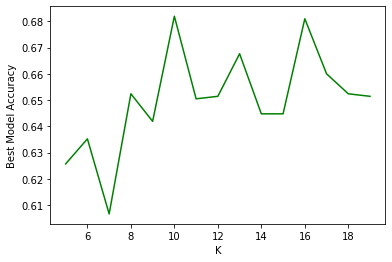

In [15]:
plt.plot(ks, k_wise_scores, color = 'g')
plt.xlabel('K')
plt.ylabel('Best Model Accuracy')


<b>As we can see the spike is maximum at random and hence, we would be considering the all the features<b>

In [16]:
# sel_five_cols = SelectKBest(mutual_info_classif, k=9)
# sel_five_cols.fit(X, Y)
# top_k = list(X.columns[sel_five_cols.get_support()])
# X = X[top_k]

In [17]:
train_x, test_x,train_y, test_y = train_test_split(x,Y, shuffle = True, stratify=Y)
clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(train_x, test_x,train_y, test_y)

 90%|████████▉ | 26/29 [00:02<00:00, 12.78it/s]

[11:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:03<00:00,  9.41it/s]


In [18]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.74               0.63     0.63      0.72   
NearestCentroid                    0.64               0.62     0.62      0.65   
DecisionTreeClassifier             0.67               0.62     0.62      0.68   
GaussianNB                         0.68               0.62     0.62      0.68   
NuSVC                              0.74               0.61     0.61      0.70   
SGDClassifier                      0.68               0.61     0.61      0.68   
LabelPropagation                   0.68               0.61     0.61      0.67   
LabelSpreading                     0.68               0.61     0.61      0.67   
LGBMClassifier                     0.70               0.60     0.60      0.68   
XGBClassifier                      0.70               0.60     0.60      0.68   
LinearDiscriminantAnalysis         0.72               0.59     0.59      0.69   
BaggingClassifier                  0.71               0.59     0.59      0.68   
KNeighborsClassifier               0.69               0.59     0.59      0.67   
AdaBoostClassifier                 0.70               0.59     0.59      0.68   
QuadraticDiscriminantAnalysis      0.67               0.58     0.58      0.66   
ExtraTreesClassifier               0.70               0.58     0.58      0.67   
LogisticRegression                 0.71               0.57     0.57      0.67   
SVC                                0.73               0.57     0.57      0.67   
LinearSVC                          0.71               0.57     0.57      0.67   
ExtraTreeClassifier                0.66               0.56     0.56      0.65   
RidgeClassifier                    0.70               0.56     0.56      0.65   
CalibratedClassifierCV             0.71               0.55     0.55      0.65   
RidgeClassifierCV                  0.70               0.55     0.55      0.65   
BernoulliNB                        0.65               0.55     0.55      0.63   
Perceptron                         0.69               0.54     0.54      0.64   
DummyClassifier                    0.70               0.50     0.50      0.58   
PassiveAggressiveClassifier        0.60               0.48     0.48      0.58   

                               Time Taken  
Model                                      
RandomForestClassifier               0.41  
NearestCentroid                      0.02  
DecisionTreeClassifier               0.03  
GaussianNB                           0.02  
NuSVC                                0.10  
SGDClassifier                        0.03  
LabelPropagation                     0.09  
LabelSpreading                       0.11  
LGBMClassifier                       0.21  
XGBClassifier                        0.29  
LinearDiscriminantAnalysis           0.03  
BaggingClassifier                    0.10  
KNeighborsClassifier                 0.03  
AdaBoostClassifier                   0.26  
QuadraticDiscriminantAnalysis        0.02  
ExtraTreesClassifier                 0.37  
LogisticRegression                   0.06  
SVC                                  0.10  
LinearSVC                            0.12  
ExtraTreeClassifier                  0.02  
RidgeClassifier                      0.02  
CalibratedClassifierCV               0.50  
RidgeClassifierCV                    0.03  
BernoulliNB                          0.02  
Perceptron                           0.02  
DummyClassifier                      0.02  
PassiveAggressiveClassifier          0.02

## 2. Model Building

<b> I would like to mention few points before starting building a model</b>

<i>Business Constraint: Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.</i>

<li> The above problem states that we should aim to minimize the False Positives or the Type 1 error should me Minimized!. </li>

<li> To minimize the Type one errors or False Positives we must focus on models having more <b>Precision</b></li>

<li>Since the dataset is nearing an imbalance, it makes it necesaary to stratify our splits. Hence, we will be performing Stratified Train, Test Splits and  while building the model</li>

<li>Since, the dataset is nearning an imbalance and we also, do not have the sufficient data to undersample it. we will be <b> OverSampling </b> the the data and train the model accordningly</li>

<li>We will be building 2 models with imblearn library which can deal with imbalanced dataset.</li>

In [19]:
from sklearn.model_selection import StratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,confusion_matrix,classification_report, precision_score, balanced_accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


In [20]:
train_x, test_x,train_y, test_y = train_test_split(X,Y, shuffle = True, stratify=Y, random_state=1)

In [21]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(train_x,train_y)


In [22]:
test_y.shape

(250,)

## Training a Random Forest Classifier

In [23]:
model = RandomForestClassifier()
model.fit(X_train_ns,y_train_ns)
y_pred_2=model.predict(test_x)


In [24]:
cm = confusion_matrix(test_y,y_pred_2)
print(balanced_accuracy_score(test_y,y_pred_2))
print(classification_report(test_y,y_pred_2))

0.6133333333333333
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       175
           1       0.51      0.39      0.44        75

    accuracy                           0.70       250
   macro avg       0.64      0.61      0.62       250
weighted avg       0.69      0.70      0.69       250



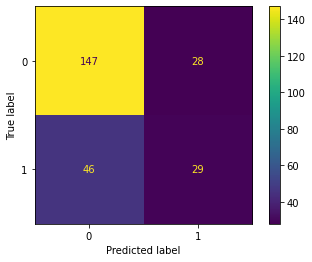

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Training a LogisticRegression Classifer

In [26]:
logistic_model = LogisticRegression()
logistic_model.fit(train_x, train_y)
y_pred = logistic_model.predict(test_x)

In [27]:
cm = confusion_matrix(test_y,y_pred)
print(balanced_accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))

0.599047619047619
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       175
           1       0.55      0.31      0.39        75

    accuracy                           0.72       250
   macro avg       0.65      0.60      0.60       250
weighted avg       0.69      0.72      0.69       250



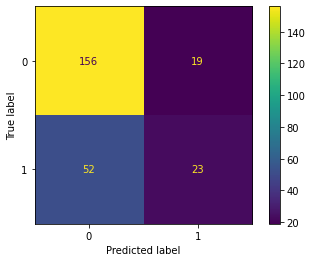

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<b>From the above 2 models we can conclude that the Logistic regression is a better classifer, since it is maximizing the Precision. <b/>

## Hyperparameter Tuning

In [29]:


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [30]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(train_x,train_y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [31]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [32]:
best_random_grid=rf_randomcv.best_estimator_

In [33]:
from sklearn.metrics import accuracy_score
y_pred_1=best_random_grid.predict(test_x)
print(confusion_matrix(test_y,y_pred))
print("Accuracy Score {}".format(accuracy_score(test_y,y_pred)))
cm_rfc_tuned = confusion_matrix(test_y,y_pred)
print("Classification report: {}".format (classification_report(test_y,y_pred)))

[[156  19]
 [ 52  23]]
Accuracy Score 0.716
Classification report:               precision    recall  f1-score   support

           0       0.75      0.89      0.81       175
           1       0.55      0.31      0.39        75

    accuracy                           0.72       250
   macro avg       0.65      0.60      0.60       250
weighted avg       0.69      0.72      0.69       250



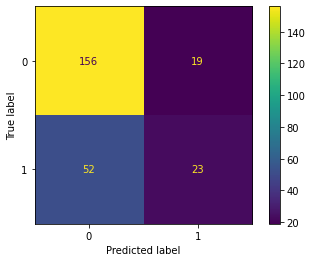

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc_tuned)
disp.plot()

In [35]:
precision_1, recall_1, threshold_1 = precision_recall_curve(test_y, y_pred_2)
precision_2, recall_2, threshold_2 = precision_recall_curve(test_y, y_pred_1)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.legend()

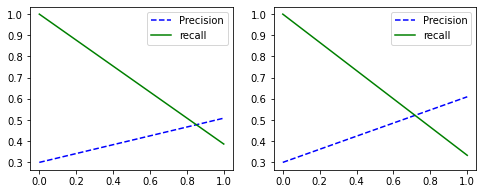

In [36]:
figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plot_precision_recall_vs_threshold(precision_1, recall_1, threshold_1)
plt.subplot(1, 2, 2)
plot_precision_recall_vs_threshold(precision_2, recall_2, threshold_2)
# There is slight change in precision and recall curve

# Explainable AI

In [37]:
import shap

### For logistic Regression model

In [39]:
explainer = shap.LinearExplainer(logistic_model, train_x)
shap_values = explainer.shap_values(test_x)
pd.DataFrame(shap_values, columns=train_x.columns).head(5)

Primary_applicant_age_in_years  Number_of_dependents  \
0                            0.02                  0.22   
1                            0.03                  0.22   
2                           -0.05                 -0.06   
3                           -0.22                 -0.06   
4                            0.17                 -0.06   

   Years_at_current_residence  Employment_status  Foreign_worker  \
0                        0.00               0.00            0.03   
1                       -0.00              -0.00            0.03   
2                        0.00               0.00            0.03   
3                        0.00               0.00            0.03   
4                       -0.00              -0.00            0.03   

   Has_coapplicant  Has_guarantor  Loan_history  Savings_account_balance  \
0            -0.03           0.07          1.33                     0.04   
1            -0.03           0.07         -0.45                     0.04   
2            -0.03           0.07         -0.45                     0.04   
3            -0.03           0.07         -0.00                    -0.08   
4            -0.03           0.07         -0.00                     0.04   

   Property  Purpose  Gender_male  Marital_status_divorced/separated/married  \
0      0.18    -0.08         0.03                                       0.04   
1     -0.27    -0.08         0.03                                       0.04   
2     -0.04     0.20        -0.05                                      -0.07   
3     -0.04     0.09         0.03                                       0.04   
4      0.18    -0.08         0.03                                       0.04   

   Marital_status_married/widowed  Marital_status_single  Housing_own  \
0                            0.03                  -0.34        -0.02   
1                            0.03                  -0.34        -0.02   
2                            0.03                   0.40        -0.02   
3                            0.03                  -0.34        -0.02   
4                            0.03                  -0.34        -0.02   

   Housing_rent  average_employed_years  interest_paid  credit_score  
0         -0.02                   -0.24          -0.00          0.12  
1         -0.02                   -0.05          -0.71          0.12  
2         -0.02                   -0.38          -0.77          0.12  
3         -0.02                   -0.05          -0.10          0.03  
4         -0.02                    0.40           0.41          0.03

explainer.expected_value

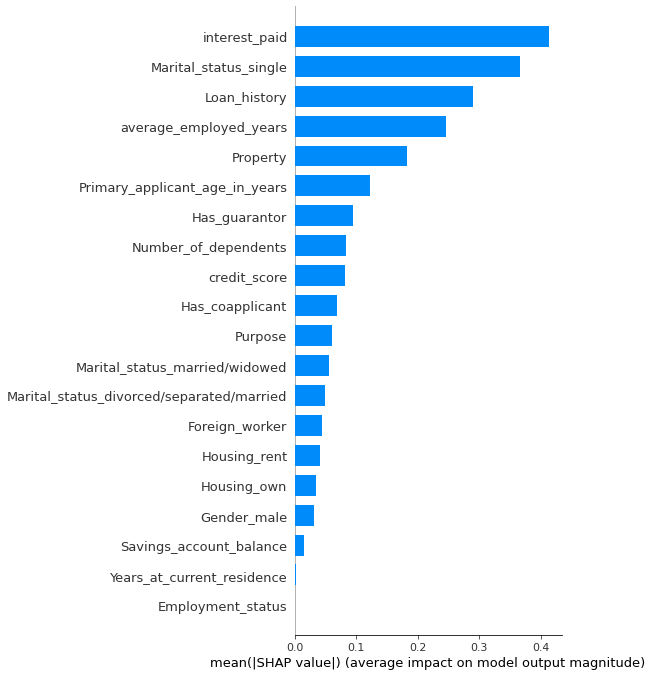

In [41]:
# Impact of Feature on model Output
shap.summary_plot(shap_values, train_x, plot_type='bar')

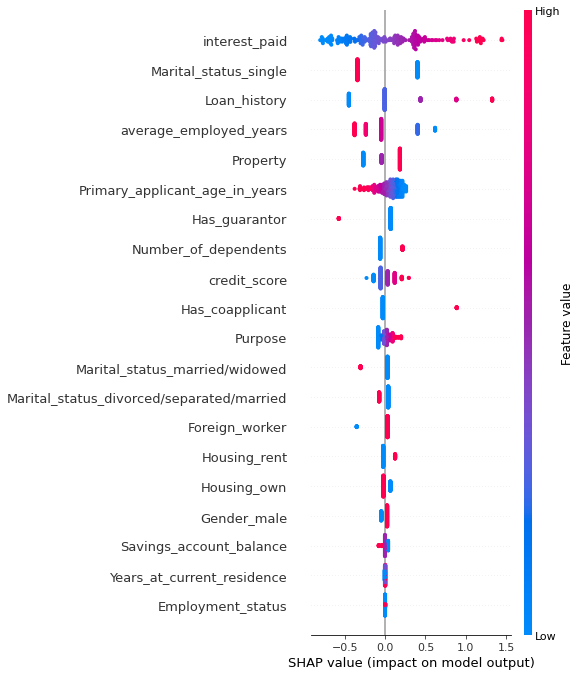

In [42]:
shap.initjs()
shap.summary_plot(shap_values,test_x, feature_names=X.columns)

### For HyperTuned Random Forest Classifier

In [47]:
train_x.shape

(750, 20)

In [48]:
test_x.shape

(250, 20)

In [49]:

explainer = shap.TreeExplainer(model = best_random_grid, data = train_x)
shap_values = explainer.shap_values(test_x)


100%|===================| 498/500 [01:40<00:00]        

In [51]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], test_x)

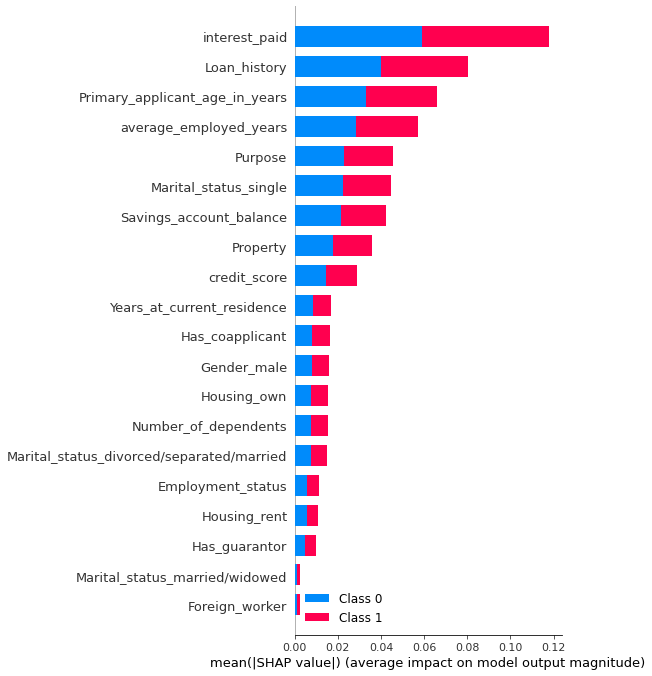

In [52]:
shap.summary_plot(shap_values, train_x)

<b>The Above chart Represents the use of each feature aacording to the class and how the feature as per model is important for a particular chart </b>

# Thankyou